# Virtual Environments

**What:**

Workspace to contain interpreter, libraries, packages, only need for the project, thus isolating software from other programs.

**Propeties:**

* Replicable
* Self-contained
* Minimal
* Directory based
* Disposable
* Not committed
* Not movable


**Why:**

Software becomes portable and replicable. Improves bug fixing process.

**How-to**

- `virtualenv`: The simplest way to create virtual environmnents. [Doc](https://docs.python.org/3/library/venv.html).
  
  1. Create:
     
     `python -m virtualenv {env-dir-name}`

  2. Activate/deactivate
     
     `source {env-dir-name}/bin/activate`
     `deactivate`

- virtual environment tools and managers
  - venv
  - conda
  - pipenv
  - venvwrapper


**Tutorials:**

* https://dev.to/bowmanjd/python-tools-for-managing-virtual-environments-3bko
* https://realpython.com/python-virtual-environments-a-primer/


In [ ]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.stats as stats
import pandas as pd
import pymc as pm
import seaborn as sns ## for making nice plots, we used this in Week 3 at the end

## this is based on code from last week. To save time and typing, we can make it a function
def credible_interval_from_samples(samples, prob):
    """`samples` can be an nd array. Assume that all of the dimensions
    except for the last index parameters while the last (rightmost)
    dimension indexes the samples."""
    samples_sorted = sort(samples, axis=-1)
    N_samples = samples.shape[-1]
    index = int(N_samples*(1 - prob)/2)
    lower = samples_sorted[..., index]
    upper = samples_sorted[..., -index]
    return lower, upper

Populating the interactive namespace from numpy and matplotlib


# Example: divorce rate in the 50 United States

In [ ]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

In [ ]:
path_to_data = 'https://raw.githubusercontent.com/ccontrer/MATH509-Winter2025-JupyterNotebooks/main/Data/'
data = pd.read_csv(path_to_data + 'WaffleDivorce.csv', sep=";", header=0)
data

Location Loc  Population  MedianAgeMarriage  Marriage  \
0                Alabama  AL        4.78               25.3      20.2   
1                 Alaska  AK        0.71               25.2      26.0   
2                Arizona  AZ        6.33               25.8      20.3   
3               Arkansas  AR        2.92               24.3      26.4   
4             California  CA       37.25               26.8      19.1   
5               Colorado  CO        5.03               25.7      23.5   
6            Connecticut  CT        3.57               27.6      17.1   
7               Delaware  DE        0.90               26.6      23.1   
8   District of Columbia  DC        0.60               29.7      17.7   
9                Florida  FL       18.80               26.4      17.0   
10               Georgia  GA        9.69               25.9      22.1   
11                Hawaii  HI        1.36               26.9      24.9   
12                 Idaho  ID        1.57               23.2      25.8   
13              Illinois  IL       12.83               27.0      17.9   
14               Indiana  IN        6.48               25.7      19.8   
15                  Iowa  IA        3.05               25.4      21.5   
16                Kansas  KS        2.85               25.0      22.1   
17              Kentucky  KY        4.34               24.8      22.2   
18             Louisiana  LA        4.53               25.9      20.6   
19                 Maine  ME        1.33               26.4      13.5   
20              Maryland  MD        5.77               27.3      18.3   
21         Massachusetts  MA        6.55               28.5      15.8   
22              Michigan  MI        9.88               26.4      16.5   
23             Minnesota  MN        5.30               26.3      15.3   
24           Mississippi  MS        2.97               25.8      19.3   
25              Missouri  MO        5.99               25.6      18.6   
26               Montana  MT        0.99               25.7      18.5   
27              Nebraska  NE        1.83               25.4      19.6   
28         New Hampshire  NH        1.32               26.8      16.7   
29            New Jersey  NJ        8.79               27.7      14.8   
30            New Mexico  NM        2.06               25.8      20.4   
31              New York  NY       19.38               28.4      16.8   
32        North Carolina  NC        9.54               25.7      20.4   
33          North Dakota  ND        0.67               25.3      26.7   
34                  Ohio  OH       11.54               26.3      16.9   
35              Oklahoma  OK        3.75               24.4      23.8   
36                Oregon  OR        3.83               26.0      18.9   
37          Pennsylvania  PA       12.70               27.1      15.5   
38          Rhode Island  RI        1.05               28.2      15.0   
39        South Carolina  SC        4.63               26.4      18.1   
40          South Dakota  SD        0.81               25.6      20.1   
41             Tennessee  TN        6.35               25.2      19.4   
42                 Texas  TX       25.15               25.2      21.5   
43                  Utah  UT        2.76               23.3      29.6   
44               Vermont  VT        0.63               26.9      16.4   
45              Virginia  VA        8.00               26.4      20.5   
46            Washington  WA        6.72               25.9      21.4   
47         West Virginia  WV        1.85               25.0      22.2   
48             Wisconsin  WI        5.69               26.3      17.2   
49               Wyoming  WY        0.56               24.2      30.7   

    Marriage SE  Divorce  Divorce SE  WaffleHouses  South  Slaves1860  \
0          1.27     12.7        0.79           128      1      435080   
1          2.93     12.5        2.05             0      0           0   
2          0.98     10.8        0.74            18      0           0   


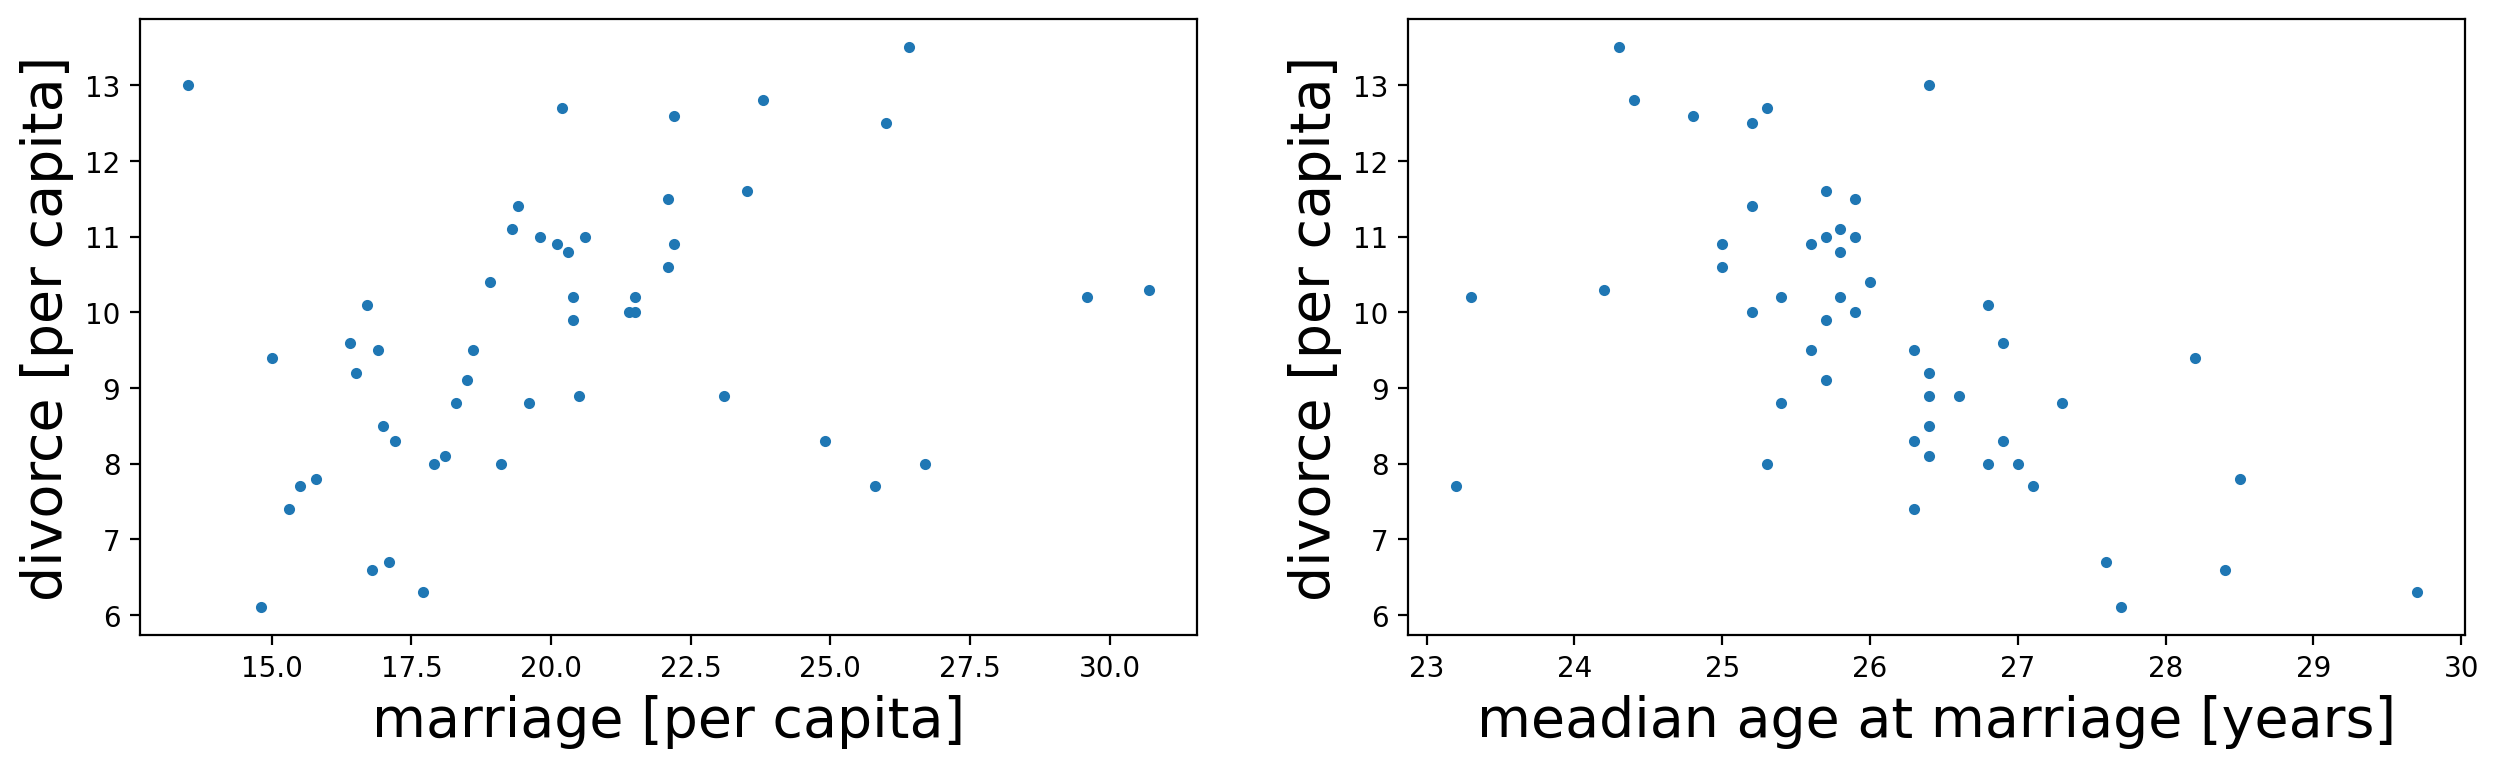

In [ ]:
fig = figure(1, [15, 4])

fig.add_subplot(121)
plot(data['Marriage'], data['Divorce'], '.')
xlabel('marriage [per capita]', fontsize=20)
ylabel('divorce [per capita]', fontsize=20)

fig.add_subplot(122)
plot(data['MedianAgeMarriage'], data['Divorce'], '.')
xlabel('meadian age at marriage [years]', fontsize=20)
ylabel('divorce [per capita]', fontsize=20);

## Standardize the data so that it has mean zero and unit standard deviation

In [ ]:
data_standardized = pd.read_csv(path_to_data + 'WaffleDivorce.csv', delimiter=";")
columns = ['MedianAgeMarriage', 'Marriage', 'Divorce']
data_standardized[columns] = (data[columns] - data[columns].mean())/data[columns].std()
data_standardized

Location Loc  Population  MedianAgeMarriage  Marriage  \
0                Alabama  AL        4.78          -0.606290  0.022644   
1                 Alaska  AK        0.71          -0.686699  1.549802   
2                Arizona  AZ        6.33          -0.204241  0.048974   
3               Arkansas  AR        2.92          -1.410387  1.655123   
4             California  CA       37.25           0.599857 -0.266989   
5               Colorado  CO        5.03          -0.284651  0.891544   
6            Connecticut  CT        3.57           1.243135 -0.793595   
7               Delaware  DE        0.90           0.439037  0.786223   
8   District of Columbia  DC        0.60           2.931739 -0.635614   
9                Florida  FL       18.80           0.278218 -0.819926   
10               Georgia  GA        9.69          -0.123831  0.522920   
11                Hawaii  HI        1.36           0.680266  1.260168   
12                 Idaho  ID        1.57          -2.294894  1.497141   
13              Illinois  IL       12.83           0.760676 -0.582953   
14               Indiana  IN        6.48          -0.284651 -0.082677   
15                  Iowa  IA        3.05          -0.525880  0.364938   
16                Kansas  KS        2.85          -0.847519  0.522920   
17              Kentucky  KY        4.34          -1.008338  0.549250   
18             Louisiana  LA        4.53          -0.123831  0.127965   
19                 Maine  ME        1.33           0.278218 -1.741486   
20              Maryland  MD        5.77           1.001905 -0.477632   
21         Massachusetts  MA        6.55           1.966822 -1.135889   
22              Michigan  MI        9.88           0.278218 -0.951577   
23             Minnesota  MN        5.30           0.197808 -1.267541   
24           Mississippi  MS        2.97          -0.204241 -0.214329   
25              Missouri  MO        5.99          -0.365060 -0.398641   
26               Montana  MT        0.99          -0.284651 -0.424971   
27              Nebraska  NE        1.83          -0.525880 -0.135338   
28         New Hampshire  NH        1.32           0.599857 -0.898917   
29            New Jersey  NJ        8.79           1.323544 -1.399192   
30            New Mexico  NM        2.06          -0.204241  0.075305   
31              New York  NY       19.38           1.886413 -0.872586   
32        North Carolina  NC        9.54          -0.284651  0.075305   
33          North Dakota  ND        0.67          -0.606290  1.734114   
34                  Ohio  OH       11.54           0.197808 -0.846256   
35              Oklahoma  OK        3.75          -1.329977  0.970535   
36                Oregon  OR        3.83          -0.043421 -0.319650   
37          Pennsylvania  PA       12.70           0.841086 -1.214880   
38          Rhode Island  RI        1.05           1.725593 -1.346532   
39        South Carolina  SC        4.63           0.278218 -0.530292   
40          South Dakota  SD        0.81          -0.365060 -0.003686   
41             Tennessee  TN        6.35          -0.686699 -0.187998   
42                 Texas  TX       25.15          -0.686699  0.364938   
43                  Utah  UT        2.76          -2.214484  2.497693   
44               Vermont  VT        0.63           0.680266 -0.977907   
45              Virginia  VA        8.00           0.278218  0.101635   
46            Washington  WA        6.72          -0.123831  0.338608   
47         West Virginia  WV        1.85          -0.847519  0.549250   
48             Wisconsin  WI        5.69           0.197808 -0.767265   
49               Wyoming  WY        0.56          -1.490797  2.787326   

    Marriage SE   Divorce  Divorce SE  WaffleHouses  South  Slaves1860  \
0          1.27  1.654205        0.79           128      1      435080   
1          2.93  1.544364        2.05             0      0           0   
2          0.98  0.610716        0.74            18      0           0

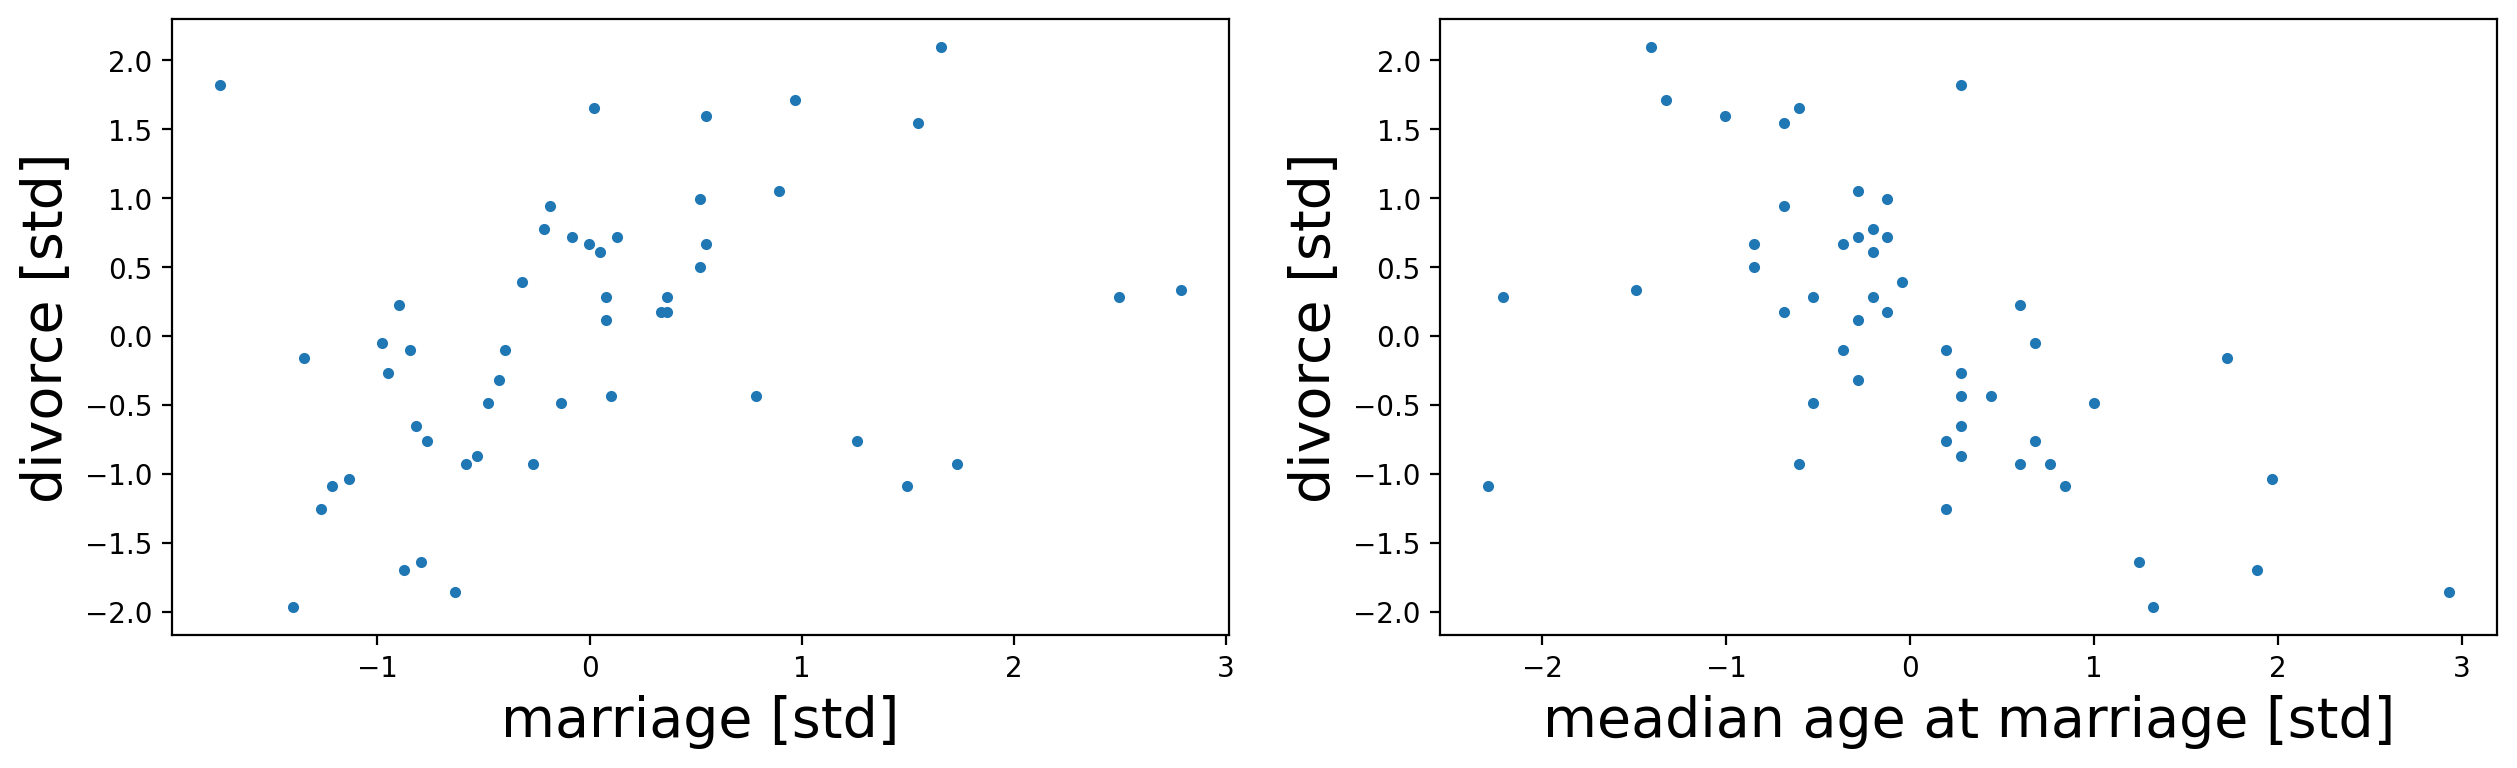

In [ ]:
fig = figure(1, [15, 4])

fig.add_subplot(121)
plot(data_standardized['Marriage'], data_standardized['Divorce'], '.')
xlabel('marriage [std]', fontsize=20)
ylabel('divorce [std]', fontsize=20)

fig.add_subplot(122)
plot(data_standardized['MedianAgeMarriage'], data_standardized['Divorce'], '.')
xlabel('meadian age at marriage [std]', fontsize=20)
ylabel('divorce [std]', fontsize=20);


The author suggests that merely comparing parameter means between bivariate regressions is no way to decide which predictor is better. They may be independent, or related or could eliminate each other. How do we understand all this?

He explains that here we may want to think **causally**.

A few interesting observations:
  1. Age has a direct impact on Divorce rate as people may grow incompatible with the parter
  2. Marriage Rate has a direct impact on Divorce rate for obvious reason (more marriages => more divorce)
  3. Finally, Age has an impact on Marriage Rate because there are more young people

Another way to represent above is:
  1. A -> D
  2. M -> D
  3. A -> M

and yet another way is to use DAG (Directed Acyclic Graphs)

## DAG

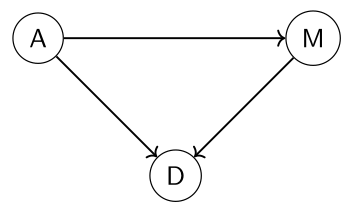


# Regression model 1
 \begin{align*}
    D_{i} &\sim \text{Normal}(\mu_i, \sigma) \\
    \mu_{i} &= \alpha + \beta_{A}A_{i} \\
    \alpha &\sim \text{Normal}(0, 0.2) \\
    \beta_{A} &\sim \text{Normal}(0, 0.5) \\
    \sigma &\sim  \text{Exponential}(1)
  \end{align*}

In [ ]:
with pm.Model() as model_5_1:
    sigma = pm.Exponential('sigma', 1)
    beta_A = pm.Normal('beta_A', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    ## Note that an underscore '_' is nothing special;
    ## it is just another character that can be part of a variable name.
    _mu = alpha + beta_A*data_standardized['MedianAgeMarriage']
    mu = pm.Deterministic('mu', _mu) ## we use this so that we can sample the posterior predictive later
    D = pm.Normal('divorce', mu=mu, sigma=sigma, observed=data_standardized['Divorce'])
    _model_5_1_mcmc_samples = pm.sample(1000, tune=1000)
model_5_1_mcmc_samples = _model_5_1_mcmc_samples.posterior.to_dataframe()

Output()

Output()

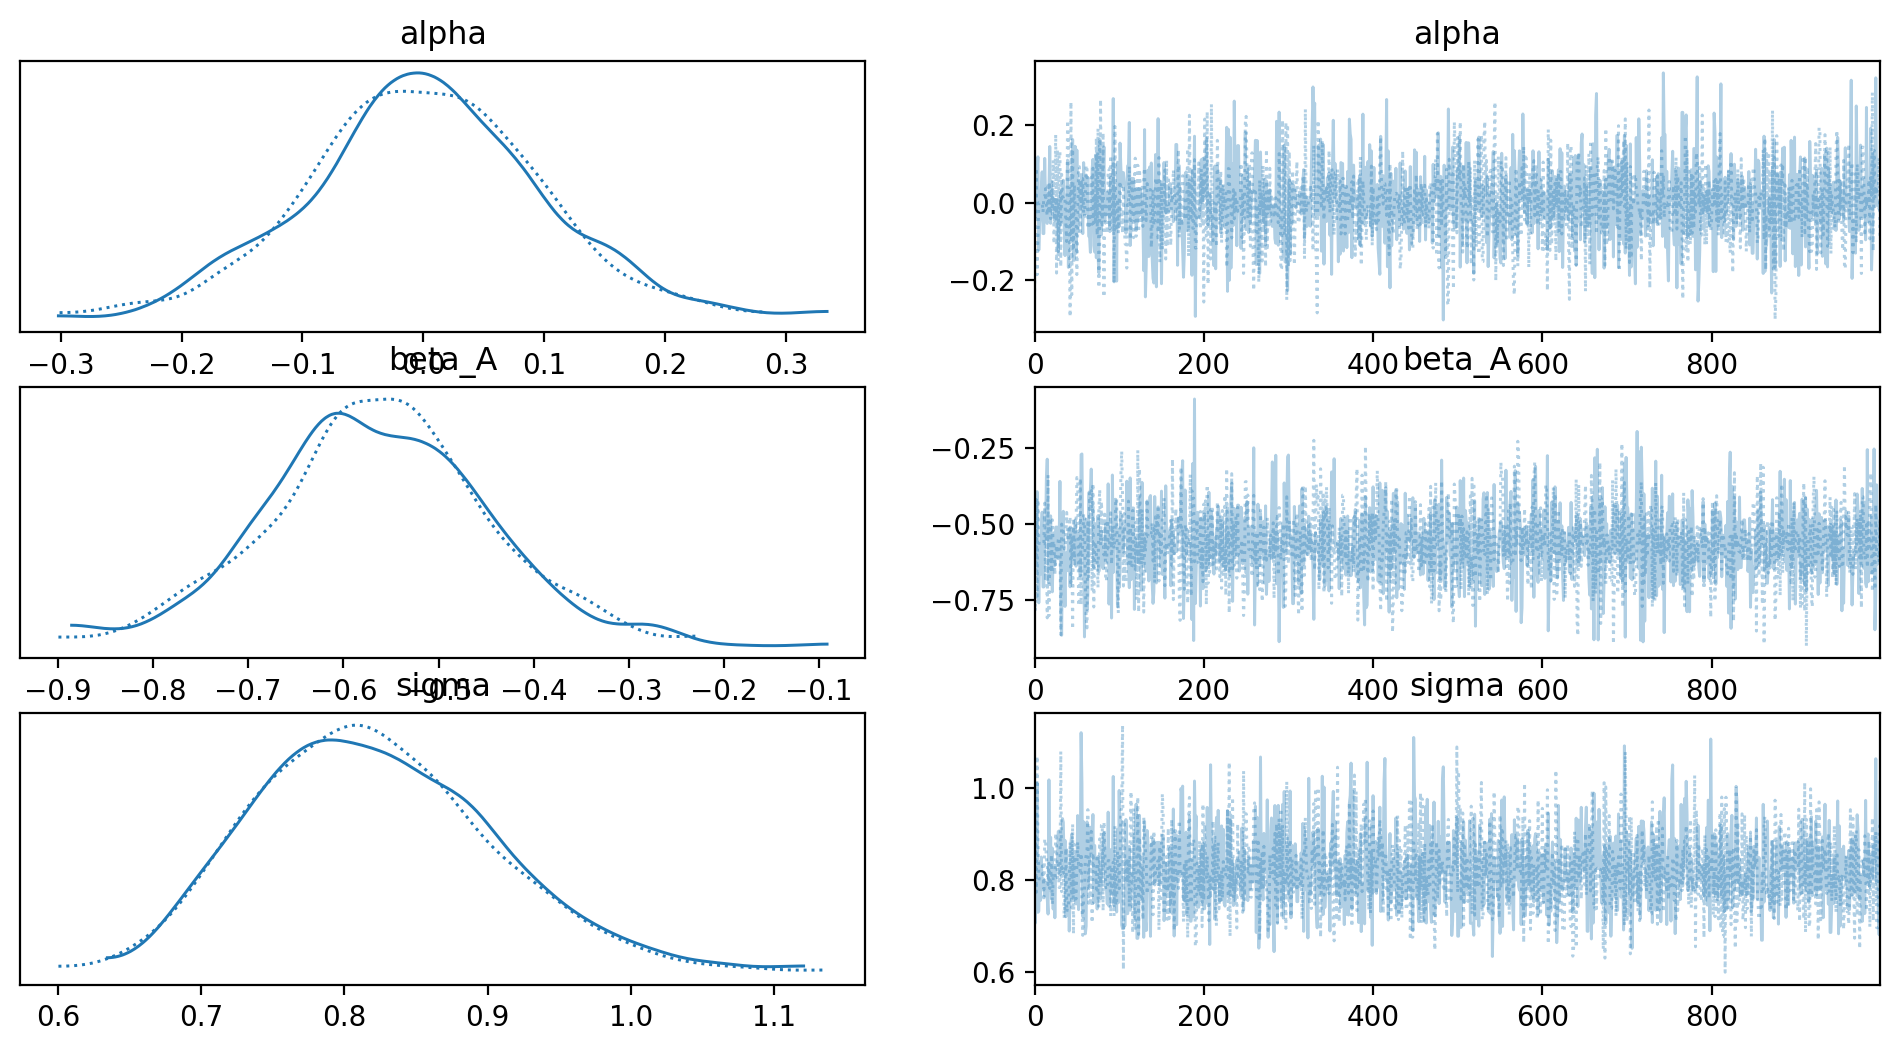

In [ ]:
varnames = ('alpha', 'beta_A', 'sigma')
pm.plot_trace(_model_5_1_mcmc_samples, varnames);

# Regression model 2
 \begin{align*}
    D_{i} &\sim \text{Normal}(\mu_i, \sigma) \\
    \mu_{i} &= \alpha + \beta_{M}M_{i} \\
    \alpha &\sim \text{Normal}(0, 0.2) \\
    \beta_{M} &\sim \text{Normal}(0, 0.5) \\
    \sigma &\sim  \text{Exponential}(1)
  \end{align*}

In [ ]:
with pm.Model() as model_5_3:
    sigma = pm.Exponential('sigma', 1)
    beta_M = pm.Normal('beta_M', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    ## Note that an underscore '_' is nothing special;
    ## it is just another character that can be part of a variable name.
    _mu = alpha + beta_M*data_standardized['Marriage']
    mu = pm.Deterministic('mu', _mu) ## we use this so that we can sample the posterior predictive later
    D = pm.Normal('divorce', mu=mu, sigma=sigma, observed=data_standardized['Divorce'])
    _model_5_2_mcmc_samples = pm.sample(1000, tune=1000)
model_5_2_mcmc_samples = _model_5_2_mcmc_samples.posterior.to_dataframe()

Output()

Output()

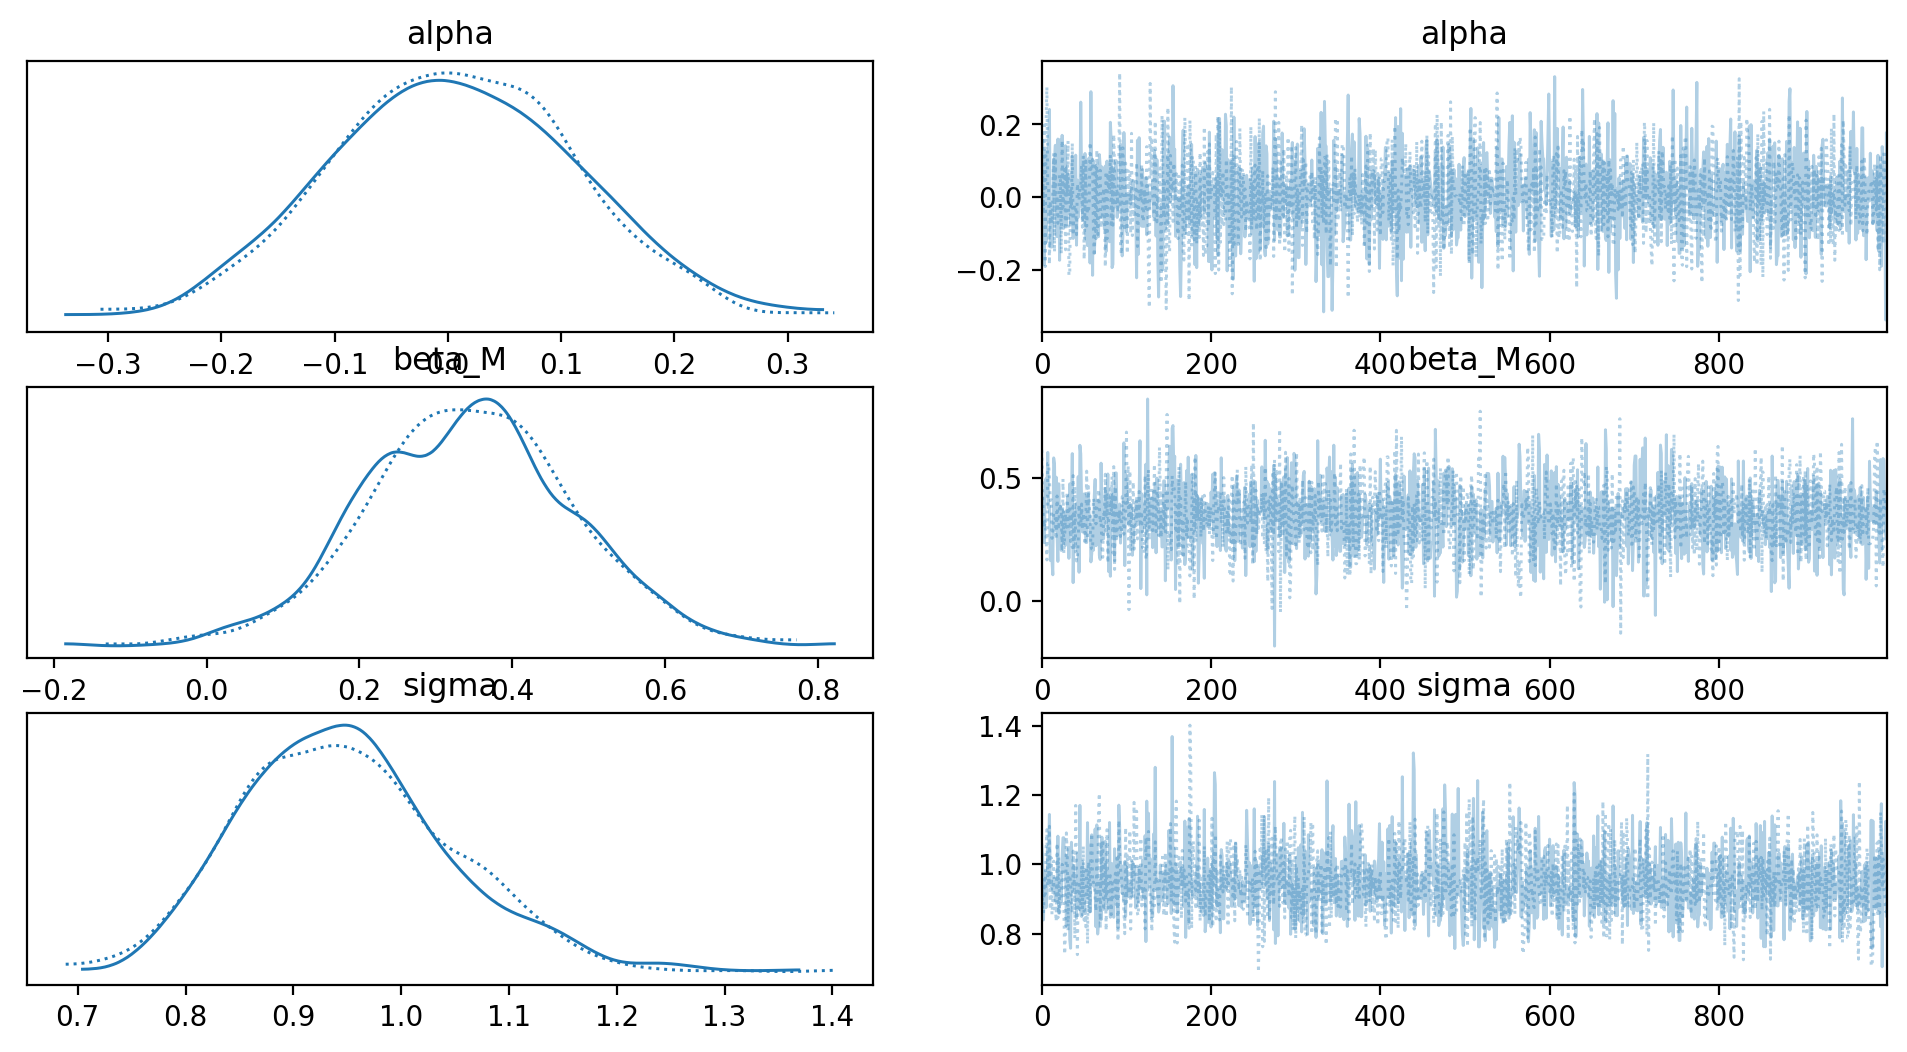

In [ ]:
varnames = ('alpha', 'beta_M', 'sigma')
pm.plot_trace(_model_5_2_mcmc_samples, varnames);

# Multiple regression model 3
 \begin{align*}
    D_{i} &\sim \text{Normal}(\mu_i, \sigma) \\
    \mu_{i} &= \alpha + \beta_{M}M_{i} + \beta_{A}A_{i} \\
    \alpha &\sim \text{Normal}(0, 0.2) \\
    \beta_{M} &\sim \text{Normal}(0, 0.5) \\
    \beta_{A} &\sim \text{Normal}(0, 0.5) \\
    \sigma &\sim  \text{Exponential}(1)
  \end{align*}

In [ ]:
with pm.Model() as model_5_3:
    sigma = pm.Exponential('sigma', 1)
    beta_A = pm.Normal('beta_A', mu=0, sigma=0.5)
    beta_M = pm.Normal('beta_M', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    ## Note that an underscore '_' is nothing special;
    ## it is just another character that can be part of a variable name.
    _mu = alpha + beta_M*data_standardized['Marriage'] + beta_A*data_standardized['MedianAgeMarriage']
    mu = pm.Deterministic('mu', _mu) ## we use this so that we can sample the posterior predictive later
    D = pm.Normal('divorce', mu=mu, sigma=sigma, observed=data_standardized['Divorce'])
    _model_5_3_mcmc_samples = pm.sample(1000, tune=1000)
model_5_3_mcmc_samples = _model_5_3_mcmc_samples.posterior.to_dataframe()

Output()

Output()

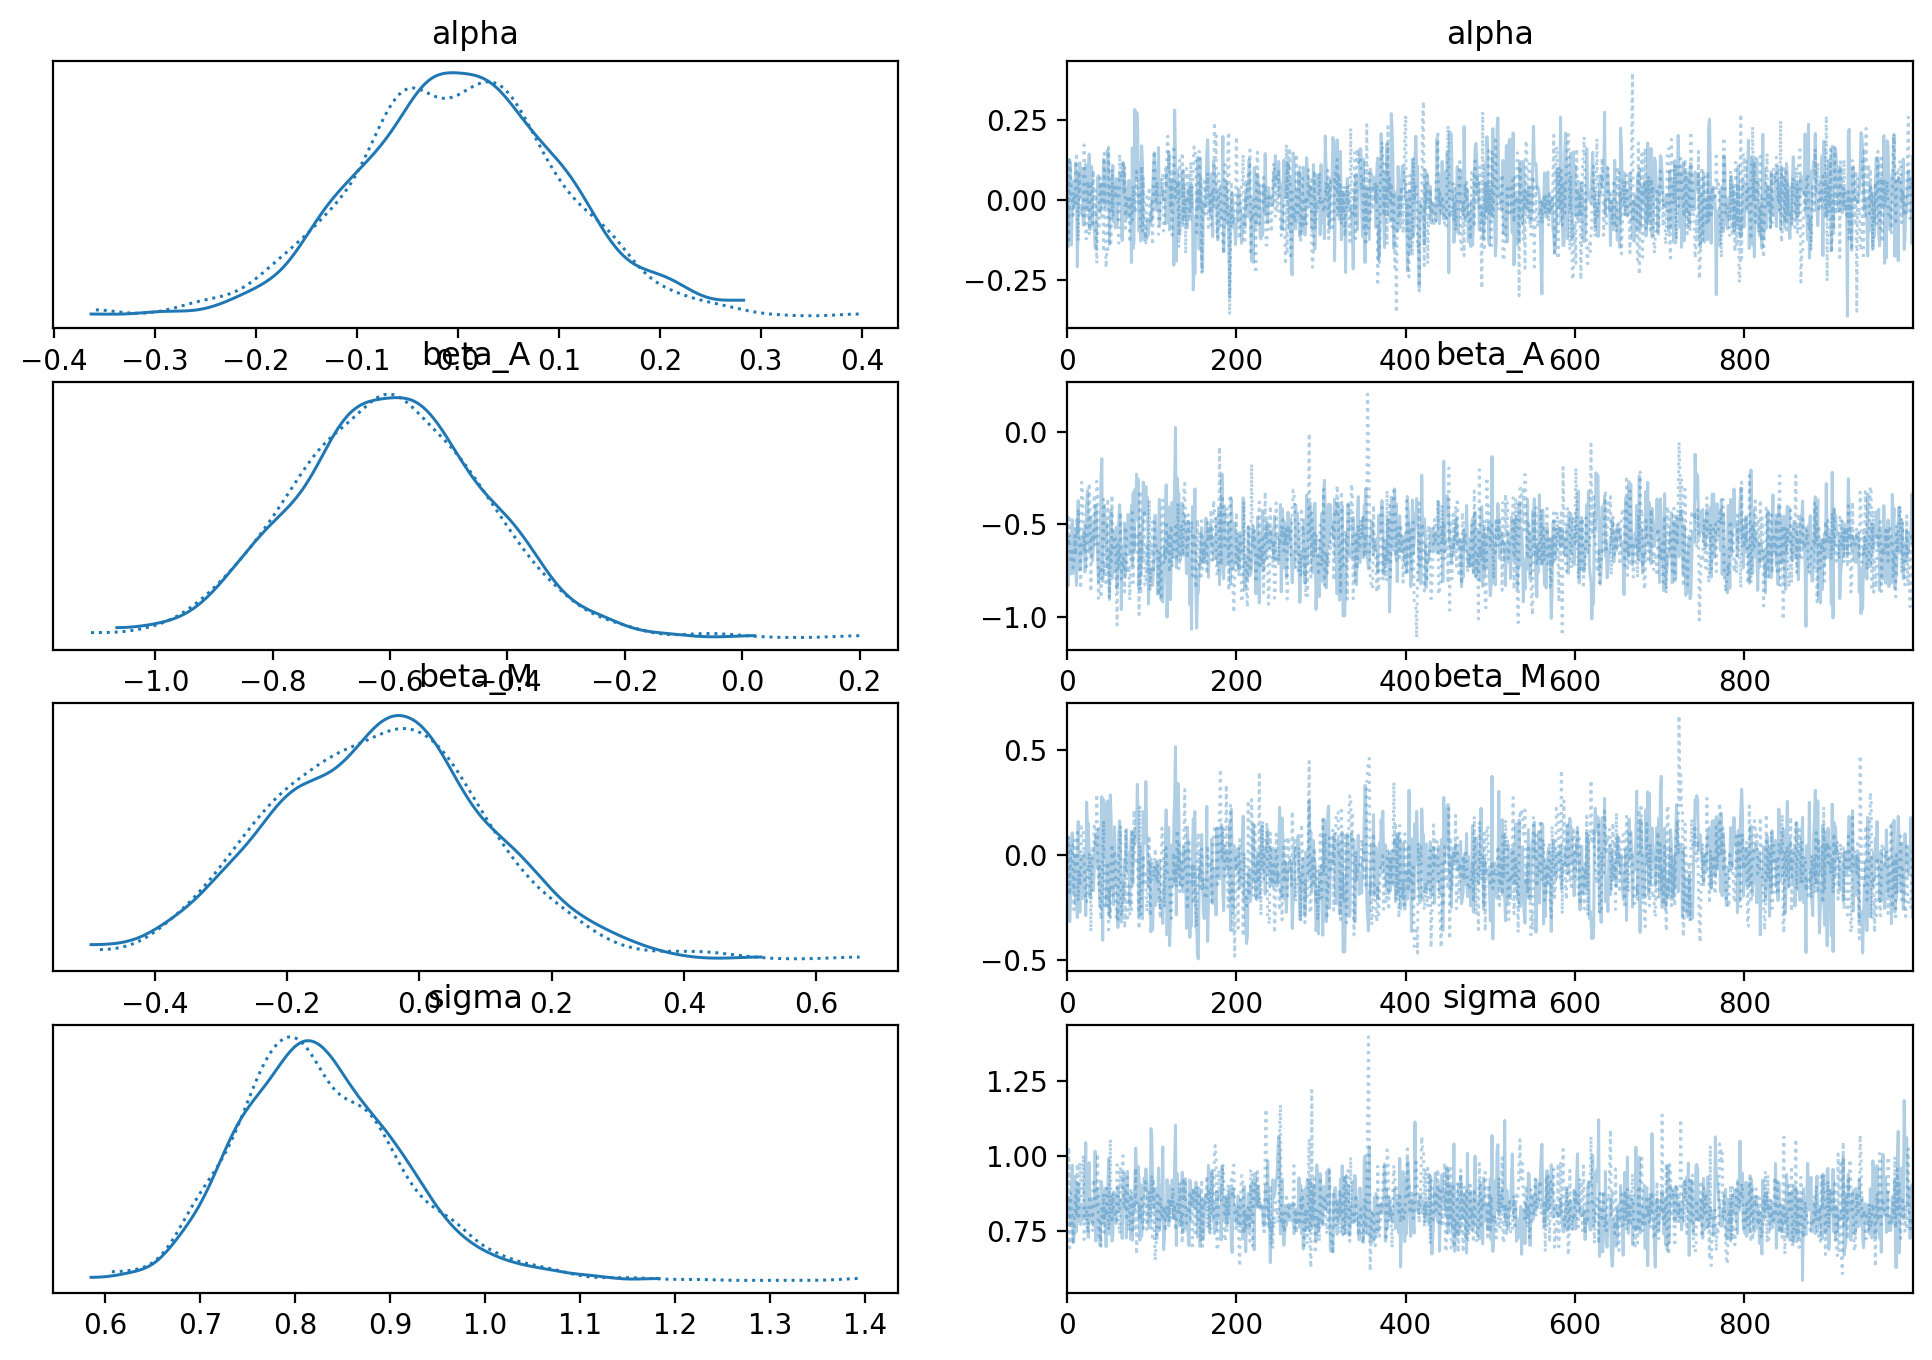

In [ ]:
varnames = ('alpha', 'beta_A', 'beta_M', 'sigma')
pm.plot_trace(_model_5_3_mcmc_samples, varnames);

## Plot the posterior for $\beta_A$ and $\beta_M$ as a boxplot
The box shows the inter quartile range: 50% of the data around the median (horizontal black line).

In [ ]:
model_5_3_mcmc_samples

alpha    beta_A    beta_M        mu     sigma
chain draw mu_dim_0                                                  
0     0    0        -0.012161 -0.596700 -0.171796  0.345721  0.807180
           1        -0.012161 -0.596700 -0.171796  0.131342  0.807180
           2        -0.012161 -0.596700 -0.171796  0.101296  0.807180
           3        -0.012161 -0.596700 -0.171796  0.545073  0.807180
           4        -0.012161 -0.596700 -0.171796 -0.324228  0.807180
...                       ...       ...       ...       ...       ...
1     999  45        0.028869 -0.660794  0.020180 -0.152925  0.738213
           46        0.028869 -0.660794  0.020180  0.117528  0.738213
           47        0.028869 -0.660794  0.020180  0.599988  0.738213
           48        0.028869 -0.660794  0.020180 -0.117325  0.738213
           49        0.028869 -0.660794  0.020180  1.070226  0.738213

[100000 rows x 5 columns]

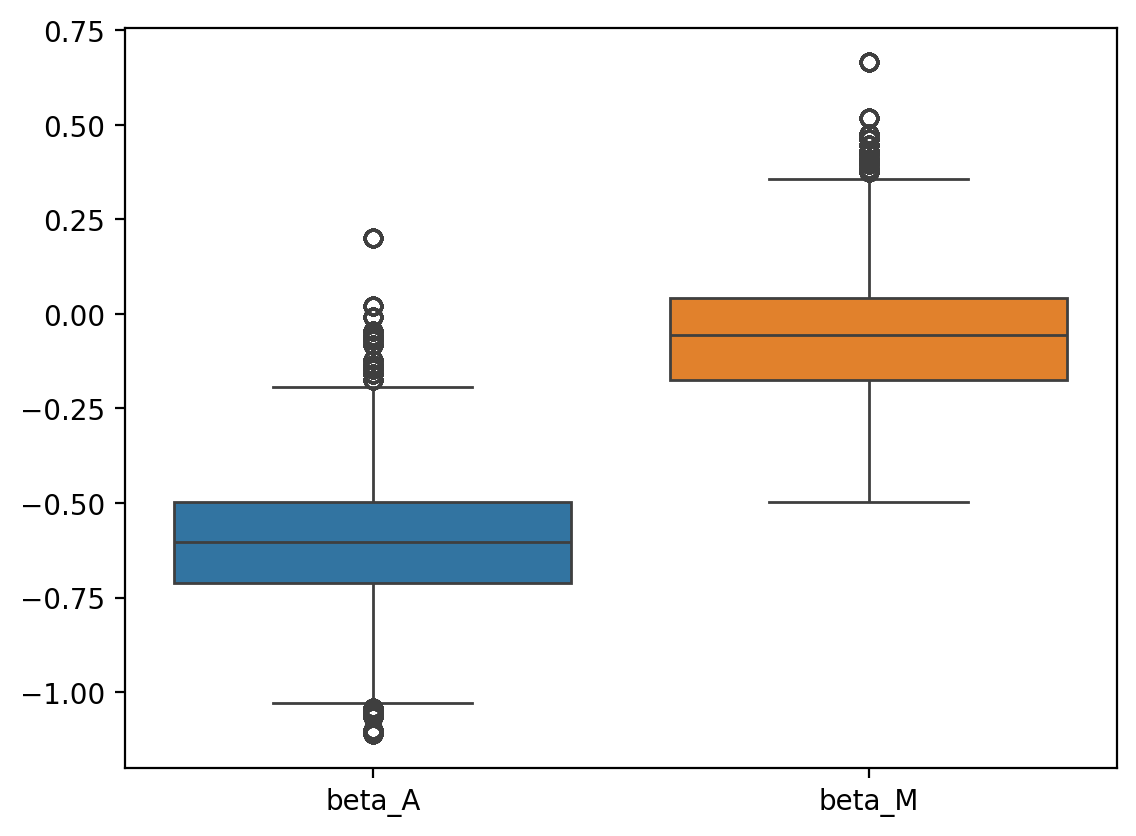

In [ ]:
sns.boxplot(data=model_5_3_mcmc_samples[['beta_A', 'beta_M']]);

## Plot the posterior for $\beta_A$ and $\beta_M$ as violin plot
A boxplot has one flaw, it has a hard time characterizing a multi model posterior (multiple peaks). An alternative is to use a tiny probability density to represent the data. This is essentially using a KDE (see Week 3 and 4 notebooks) in each column. **Note that in this case the posterior appears to be unimodel (i.e., a single peak).**

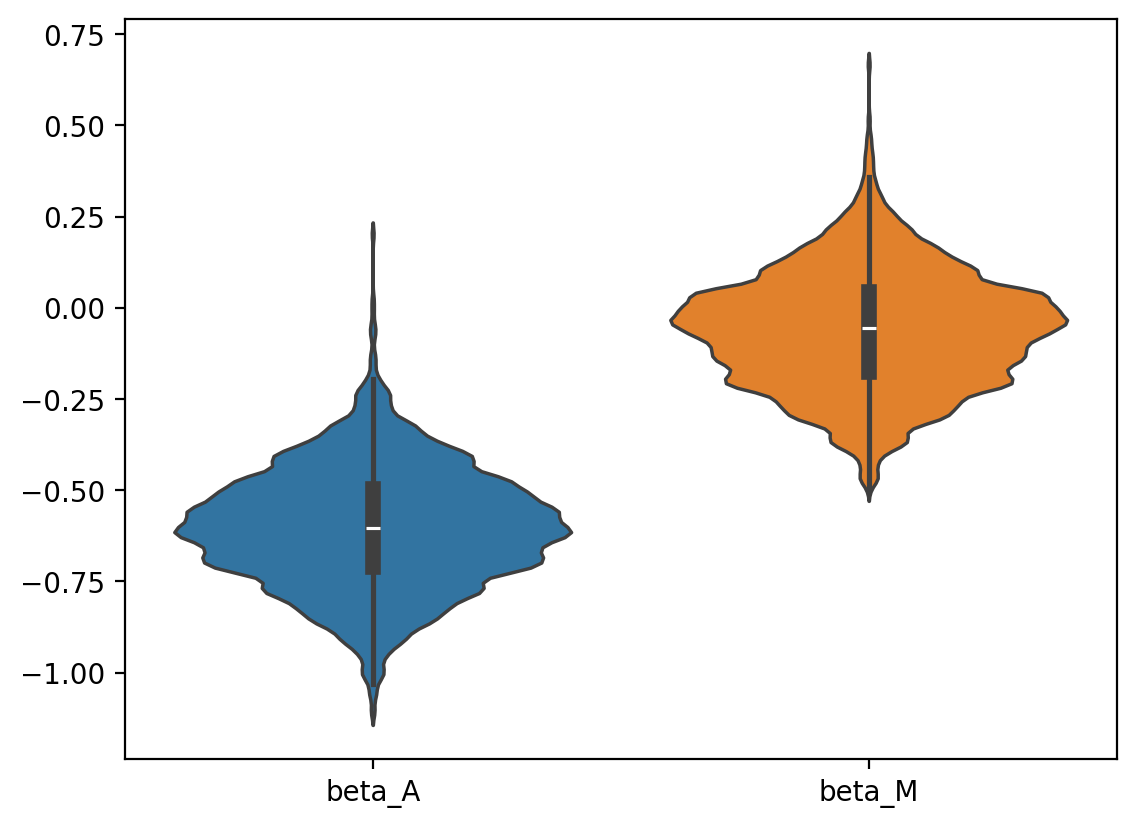

In [ ]:
sns.violinplot(data=model_5_3_mcmc_samples[['beta_A', 'beta_M']]);

### How does the posterior distribution of parameters $\beta_A$ and $\beta_M$ compare between models 1, 2 and 3?

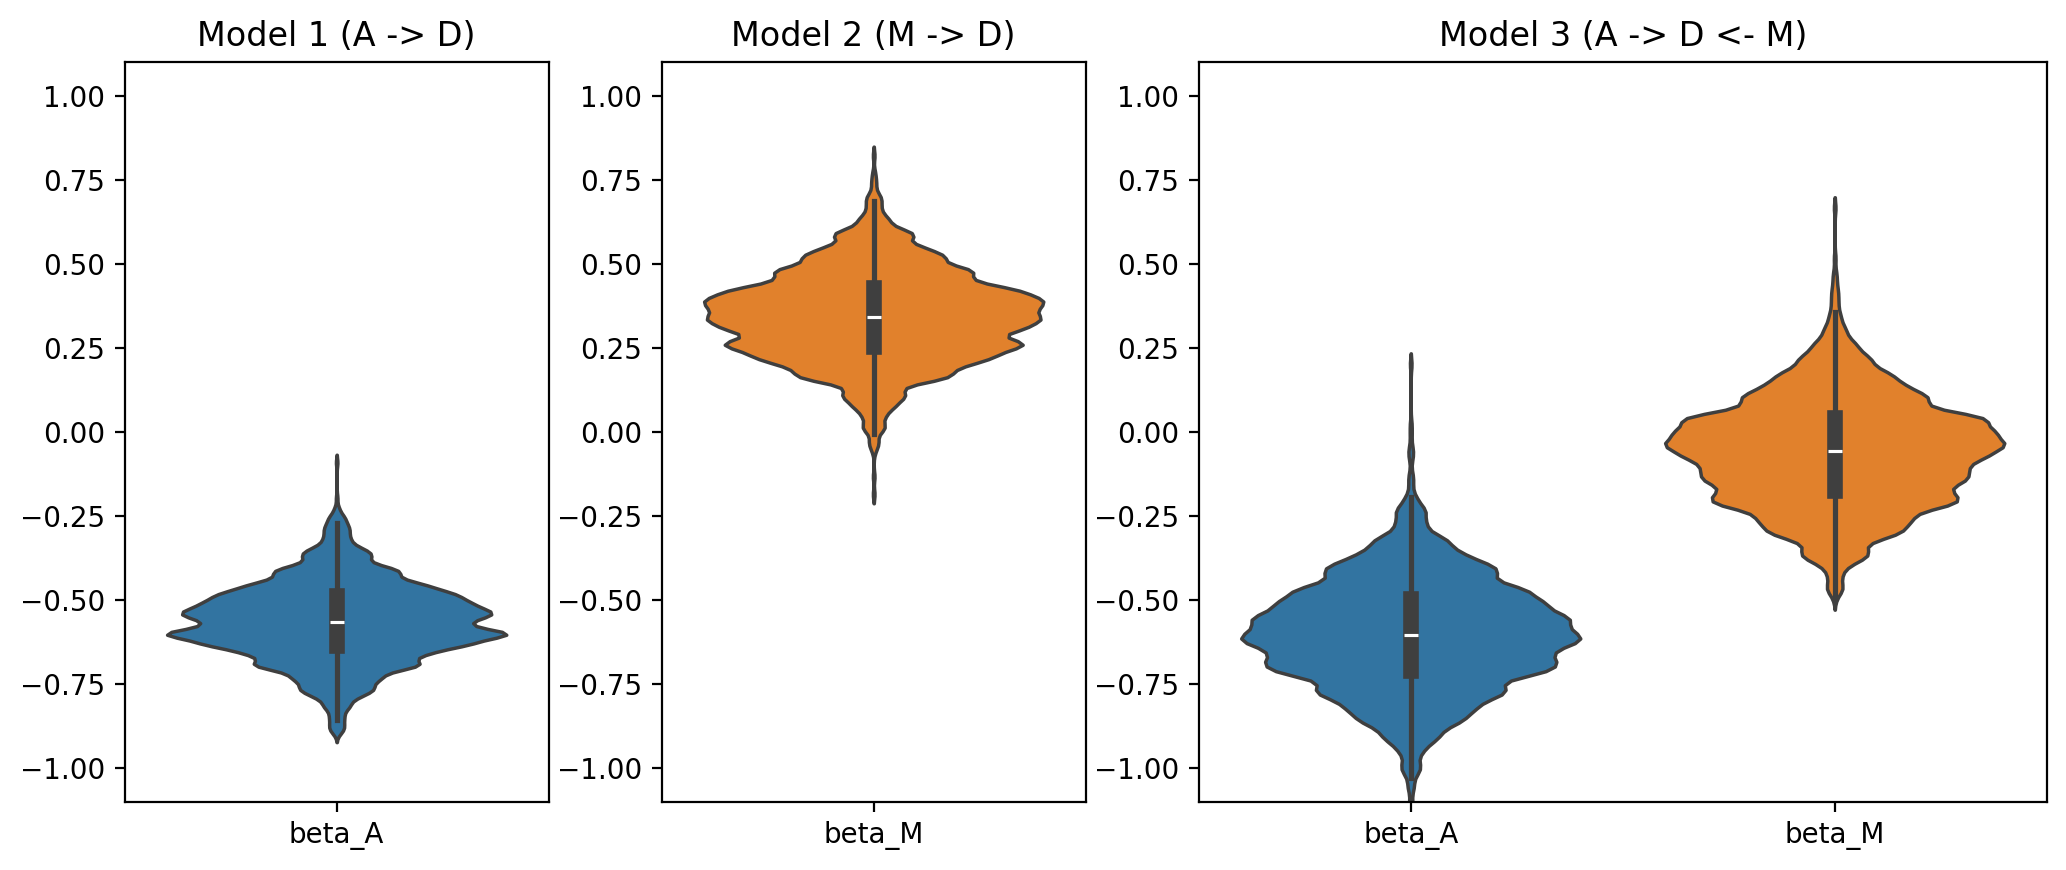

In [ ]:
fig, ax = subplots(1, 3, figsize=(12.4, 4.8), gridspec_kw={'width_ratios': [1, 1, 2]})
sns.violinplot(data=model_5_1_mcmc_samples[['beta_A']], ax=ax[0]).set(ylim=(-1.1, 1.1), title="Model 1 (A -> D)")
sns.violinplot(data=model_5_2_mcmc_samples[['beta_M']], color='C1', ax=ax[1]).set(ylim=(-1.1, 1.1), title="Model 2 (M -> D)")
sns.violinplot(data=model_5_3_mcmc_samples[['beta_A', 'beta_M']], ax=ax[2]).set(ylim=(-1.1, 1.1), title="Model 3 (A -> D <- M)");

What does this say about the effect of
 * marriage on divorce?
 * marriage on divorce conditioned on age?

## Posterior predictive plots
The PyMC3 package gives us a big shortcut for computing posterior predictive samples. (Compare this to our code from Week 4.)

In [ ]:
with model_5_3:
    posterior_predictive_samples = pm.sample_posterior_predictive(
        _model_5_3_mcmc_samples,
        var_names=["mu", "divorce"],
        # sample_dims=1000
        )['posterior_predictive']
posterior_predictive_samples.keys() ## the output is a Python dictionary

KeysView(<xarray.Dataset>
Dimensions:        (chain: 2, draw: 1000, mu_dim_2: 50, divorce_dim_2: 50)
Coordinates:
  * chain          (chain) int64 0 1
  * draw           (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_dim_2       (mu_dim_2) int64 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48 49
  * divorce_dim_2  (divorce_dim_2) int64 0 1 2 3 4 5 6 ... 43 44 45 46 47 48 49
Data variables:
    mu             (chain, draw, mu_dim_2) float64 0.1891 -0.008802 ... 0.56
    divorce        (chain, draw, divorce_dim_2) float64 0.6498 0.4562 ... 0.7264
Attributes:
    created_at:                 2024-01-23T19:11:46.147155
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.7.2)

In [ ]:
posterior_predictive_samples['divorce'].shape

(2, 1000, 50)

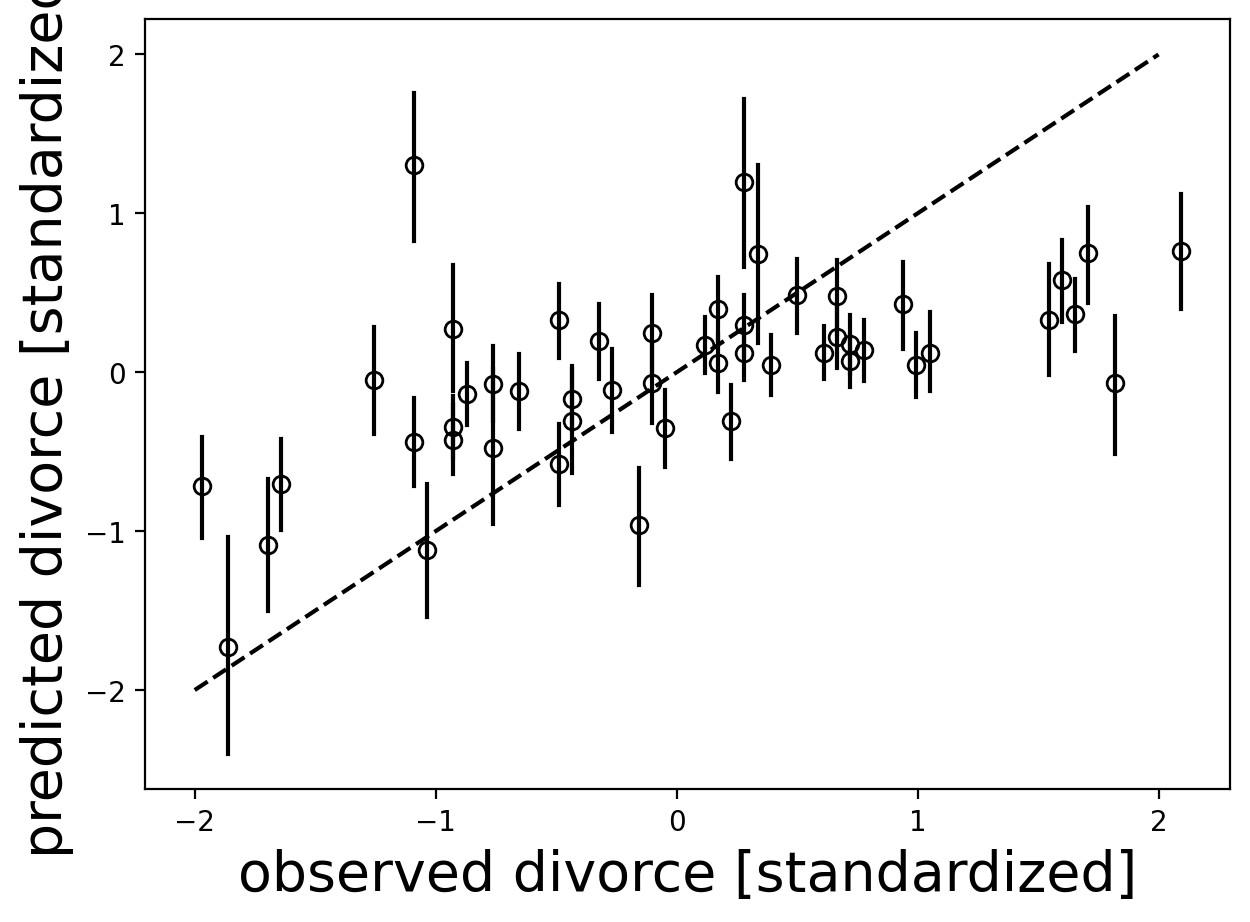

In [ ]:
mu_lower, mu_upper = credible_interval_from_samples(
    np.array(posterior_predictive_samples['mu']).transpose(2, 0, 1).reshape(50, -1),
    0.89)
mu_mean = posterior_predictive_samples['mu'].mean(axis=(0, 1))

figure(1, [7, 5])
plot(linspace(-2, 2), linspace(-2, 2), '--k')
plot(data_standardized['Divorce'], mu_mean, 'ko', mfc='none')
## plot a verticle line for each credible interval
cred_ints = array([mu_lower, mu_upper])
divorce_stacked = array(data_standardized['Divorce'])[None, :]*ones((2, 1))
plot(divorce_stacked, cred_ints, 'k')

ylabel('predicted divorce [standardized]', fontsize=20)
xlabel('observed divorce [standardized]', fontsize=20);

### Warning: the above plot might look like a linear regression (similar to last week) but it this is not the meaning. The dashed line indicates where the prediction exactly matches the observed divorce rate. This would be the same dashed line even if we used nonlinear regression.

# Counterfactual plots
The idea is to generate posterior prediction samples with specific values of an intervention variable. First, we will look at an example where the intervention variable is age.
  1. Generate parameter posterior samples of the combined model (includes effect of A -> M)
  2. Generate an array of values for intervention variable (e.g., for age)
  3. Use parameter posterior samples and manipulated ages to generate posterior prediction samples (of M and D)
  4. Plot the corresponding trends for M and D vs the intervention variable

In [ ]:
with pm.Model() as model_5_4:
    ## A -> M
    sigma_M = pm.Exponential('sigma_M', 1)
    beta_AM = pm.Normal('beta_AM', 0, 0.5)
    alpha_M = pm.Normal('alpha_M', 0, 0.2)
    mu_M = pm.Deterministic('mu_m', alpha_M + beta_AM*data_standardized["MedianAgeMarriage"])
    marriage = pm.Normal('marriage', mu_M, sigma_M, observed=data_standardized["Marriage"])

    ## A -> D <- M
    sigma = pm.Exponential('sigma', 1)
    beta_A = pm.Normal('beta_A', mu=0, sigma=0.5)
    beta_M = pm.Normal('beta_M', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    ## Note that an underscore '_' is nothing special;
    ## it is just another character that can be part of a variable name.
    _mu = alpha + beta_M*marriage + beta_A*data_standardized["MedianAgeMarriage"]
    mu = pm.Deterministic('mu', _mu) ## we use this so that we can sample the posterior predictive later
    D = pm.Normal('divorce', mu=mu, sigma=sigma, observed=data_standardized['Divorce'])
    ## MCMC
    _model_5_4_mcmc_samples = pm.sample(1000, tune=1000)
model_5_4_mcmc_samples = _model_5_4_mcmc_samples.posterior.to_dataframe()
model_5_4_mcmc_samples

beta_AM   alpha_M    beta_A    beta_M  \
chain draw mu_m_dim_0 mu_dim_0                                           
0     0    0          0        -0.646735  0.102356 -0.751386 -0.094276   
                      1        -0.646735  0.102356 -0.751386 -0.094276   
                      2        -0.646735  0.102356 -0.751386 -0.094276   
                      3        -0.646735  0.102356 -0.751386 -0.094276   
                      4        -0.646735  0.102356 -0.751386 -0.094276   
...                                  ...       ...       ...       ...   
1     999  49         45       -0.765339  0.017108 -0.306428  0.116079   
                      46       -0.765339  0.017108 -0.306428  0.116079   
                      47       -0.765339  0.017108 -0.306428  0.116079   
                      48       -0.765339  0.017108 -0.306428  0.116079   
                      49       -0.765339  0.017108 -0.306428  0.116079   

                                   alpha   sigma_M     sigma      mu_m  \
chain draw mu_m_dim_0 mu_dim_0                                           
0     0    0          0         0.137350  0.691275  0.840460  0.494465   
                      1         0.137350  0.691275  0.840460  0.494465   
                      2         0.137350  0.691275  0.840460  0.494465   
                      3         0.137350  0.691275  0.840460  0.494465   
                      4         0.137350  0.691275  0.840460  0.494465   
...                                  ...       ...       ...       ...   
1     999  49         45       -0.196791  0.791735  0.958777  1.158073   
                      46       -0.196791  0.791735  0.958777  1.158073   
                      47       -0.196791  0.791735  0.958777  1.158073   
                      48       -0.196791  0.791735  0.958777  1.158073   
                      49       -0.196791  0.791735  0.958777  1.158073   

                                      mu  
chain draw mu_m_dim_0 mu_dim_0            
0     0    0          0         0.590773  
                      1         0.507217  
                      2         0.286197  
                      3         1.041056  
                      4        -0.288203  
...                                  ...  
1     999  49         45       -0.270247  
                      46       -0.119541  
                      47        0.126669  
                      48       -0.346469  
                      49        0.583581  

[5000000 rows x 9 columns]

### I didn't use the PyMC3 package to generate posterior prediction samples because I found it to be very confusing. It hides too many steps. We might use it in the future, but I think it helps to see the steps first.

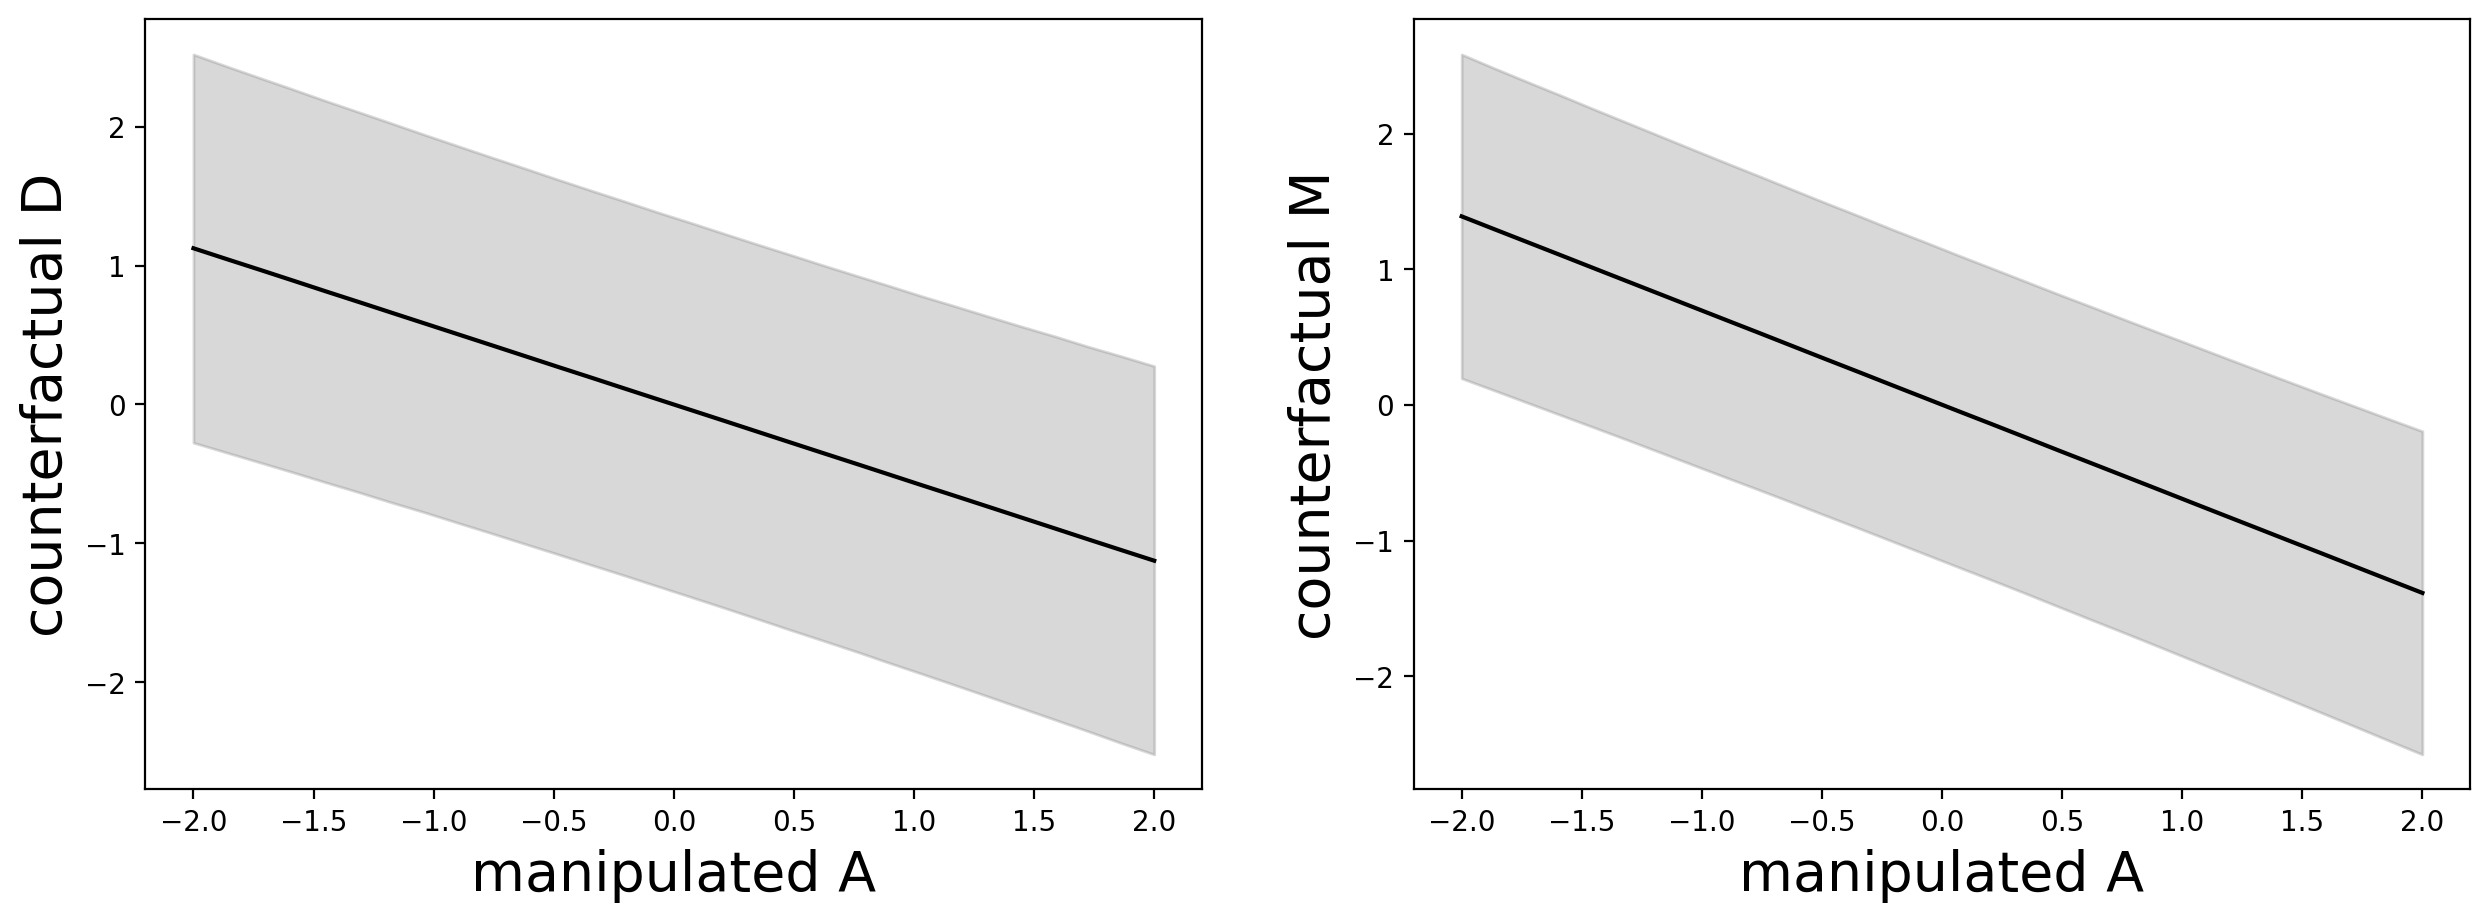

In [ ]:
N_cf = 30
N_posterior_samples = model_5_4_mcmc_samples.shape[0]
## intervention variable is Age
A_counter_factual = linspace(-2, 2, N_cf) ## the manipulated values for age

## first generate posterior predictive samples of M, using
## parameter posterior samples and intervention variable
alpha_M_post = array(model_5_4_mcmc_samples['alpha_M'])
beta_AM_post = array(model_5_4_mcmc_samples['beta_AM'])
sigma_M_post = array(model_5_4_mcmc_samples['sigma_M'])
mu_M = (alpha_M_post[None, :]
        + beta_AM_post[None, :]*A_counter_factual[:, None])
M = stats.norm.rvs(
    mu_M,
    sigma_M_post[None, :],
    size=(N_cf, N_posterior_samples))

## use above generated samples of M (along with parameter
## posterior samples) to generate samples of D
alpha_post = array(model_5_4_mcmc_samples['alpha'])
beta_A_post = array(model_5_4_mcmc_samples['beta_A'])
beta_M_post = array(model_5_4_mcmc_samples['beta_M'])
sigma_post = array(model_5_4_mcmc_samples['sigma'])
mu = (alpha_post[None, :]
      + beta_A_post[None, :]*A_counter_factual[:, None]
      + beta_M_post[None, :]*M)
D = stats.norm.rvs(
    mu,
    sigma_post[None, :],
    size=(N_cf, N_posterior_samples))


## Plot the result: credible intervals etc
prob = 0.89
M_lower, M_upper = credible_interval_from_samples(M, prob)
D_lower, D_upper = credible_interval_from_samples(D, prob)

fig = figure(1, [15, 5])

fig.add_subplot(121)
fill_between(A_counter_factual, D_upper, D_lower, color='0.5', alpha=0.3)
plot(A_counter_factual, D.mean(axis=1), 'k')
ylabel('counterfactual D', fontsize=20)
xlabel('manipulated A', fontsize=20);

fig.add_subplot(122)
fill_between(A_counter_factual, M_upper, M_lower, color='0.5', alpha=0.3)
plot(A_counter_factual, M.mean(axis=1), 'k')
ylabel('counterfactual M', fontsize=20)
xlabel('manipulated A', fontsize=20);

## Let's look at another example, this time we will use marriage as the intervention variable
Since we have no causal relationship of M -> A, and because A influences D, we will set $A=0$ for this example.

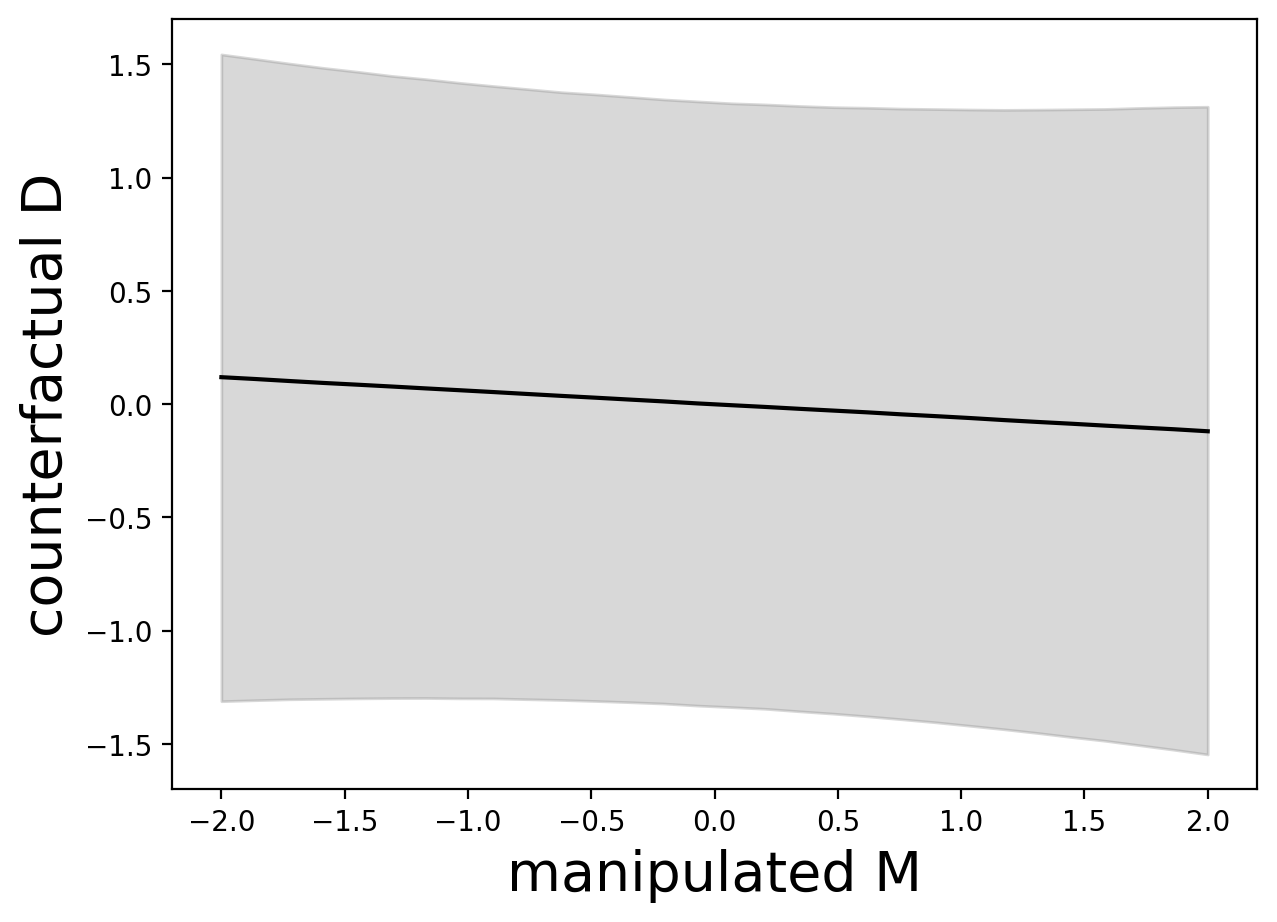

In [ ]:
N_cf = 30
N_posterior_samples = model_5_4_mcmc_samples.shape[0]
## intervention variable is Age
M_counter_factual = linspace(-2, 2, N_cf) ## the manipulated values for age
A = zeros(N_cf)

## use above generated samples of M (along with parameter
## posterior samples) to generate samples of D
alpha_post = array(model_5_4_mcmc_samples['alpha'])
beta_A_post = array(model_5_4_mcmc_samples['beta_A'])
beta_M_post = array(model_5_4_mcmc_samples['beta_M'])
sigma_post = array(model_5_4_mcmc_samples['sigma'])
mu = (alpha_post[None, :]
      + beta_A_post[None, :]*A[:, None]
      + beta_M_post[None, :]*M_counter_factual[:, None])
D = stats.norm.rvs(
    mu,
    sigma_post[None, :],
    size=(N_cf, N_posterior_samples))


## Plot the result: credible intervals etc
prob = 0.89
D_lower, D_upper = credible_interval_from_samples(D, prob)

figure(1, [7, 5])

fill_between(M_counter_factual, D_upper, D_lower, color='0.5', alpha=0.3)
plot(M_counter_factual, D.mean(axis=1), 'k')
ylabel('counterfactual D', fontsize=20)
xlabel('manipulated M', fontsize=20);

-----
# Next example: composition of milk across primate species, as well as some facts about those species, like body mass and brain size

In [ ]:
data_ex2 = pd.read_csv(path_to_data + 'milk.csv', delimiter=";")
data_ex2 = data_ex2[~isnan(data_ex2['neocortex.perc'])]
data_ex2['mass'] = log(data_ex2['mass'])
data_ex2

clade                  species  kcal.per.g  perc.fat  \
0      Strepsirrhine           Eulemur fulvus        0.49     16.60   
5   New World Monkey       Alouatta seniculus        0.47     21.22   
6   New World Monkey               A palliata        0.56     29.66   
7   New World Monkey             Cebus apella        0.89     53.41   
9   New World Monkey               S sciureus        0.92     50.58   
10  New World Monkey         Cebuella pygmaea        0.80     41.35   
11  New World Monkey        Callimico goeldii        0.46      3.93   
12  New World Monkey       Callithrix jacchus        0.71     38.38   
15  Old World Monkey      Miopithecus talpoin        0.68     40.15   
17  Old World Monkey                M mulatta        0.97     55.51   
19  Old World Monkey                Papio spp        0.84     54.31   
21               Ape            Hylobates lar        0.62     34.51   
23               Ape           Pongo pygmaeus        0.54     37.78   
24               Ape  Gorilla gorilla gorilla        0.49     27.18   
26               Ape             Pan paniscus        0.48     21.18   
27               Ape            P troglodytes        0.55     36.84   
28               Ape             Homo sapiens        0.71     50.49   

    perc.protein  perc.lactose      mass  neocortex.perc  
0          15.42         67.98  0.667829           55.16  
5          23.58         55.20  1.658228           64.54  
6          23.46         46.88  1.680828           64.54  
7          15.80         30.79  0.920283           67.64  
9          22.33         27.09 -0.385662           68.85  
10         20.85         37.80 -2.120264           58.85  
11         25.30         70.77 -0.755023           61.69  
12         20.09         41.53 -1.139434           60.32  
15         18.08         41.77  0.438255           69.97  
17         13.17         31.32  1.175573           70.41  
19         10.97         34.72  2.509599           73.40  
21         12.57         52.92  1.680828           67.53  
23          7.37         54.85  3.568969           71.26  
24         16.29         56.53  4.374876           72.60  
26         11.68         67.14  3.707210           70.24  
27          9.54         53.62  3.499835           76.30  
28          9.84         39.67  4.006424           75.49

In [ ]:
columns = ['mass', 'neocortex.perc', 'kcal.per.g']
data_ex2_standardized = (data_ex2[columns] - data_ex2[columns].mean())/data_ex2[columns].std()
data_ex2_standardized

mass  neocortex.perc  kcal.per.g
0  -0.430154       -2.080196   -0.969623
5   0.082211       -0.508641   -1.085298
6   0.093902       -0.508641   -0.564763
7  -0.299552        0.010742    1.343864
9  -0.975160        0.213470    1.517376
10 -1.872525       -1.461962    0.823329
11 -1.166241       -0.986139   -1.143135
12 -1.365110       -1.215673    0.302795
15 -0.548921        0.401118    0.129283
17 -0.167482        0.474837    1.806561
19  0.522653        0.975791    1.054678
21  0.093902       -0.007687   -0.217740
23  1.070699        0.617249   -0.680437
24  1.487620        0.841756   -0.969623
26  1.142215        0.446355   -1.027461
27  1.034934        1.461666   -0.622600
28  1.297008        1.325956    0.302795

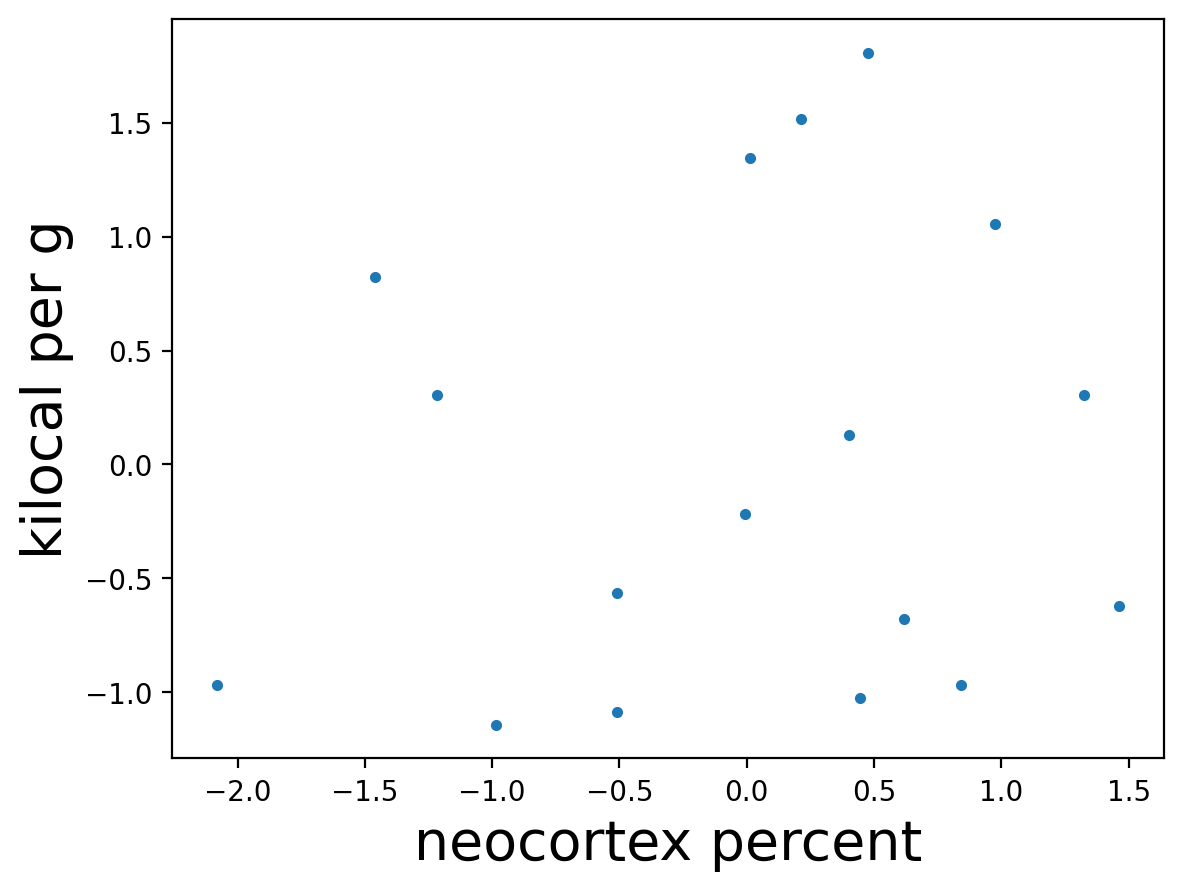

In [ ]:
plot(data_ex2_standardized['neocortex.perc'], data_ex2_standardized['kcal.per.g'], '.')
xlabel('neocortex percent', fontsize=20)
ylabel('kilocal per g', fontsize=20);

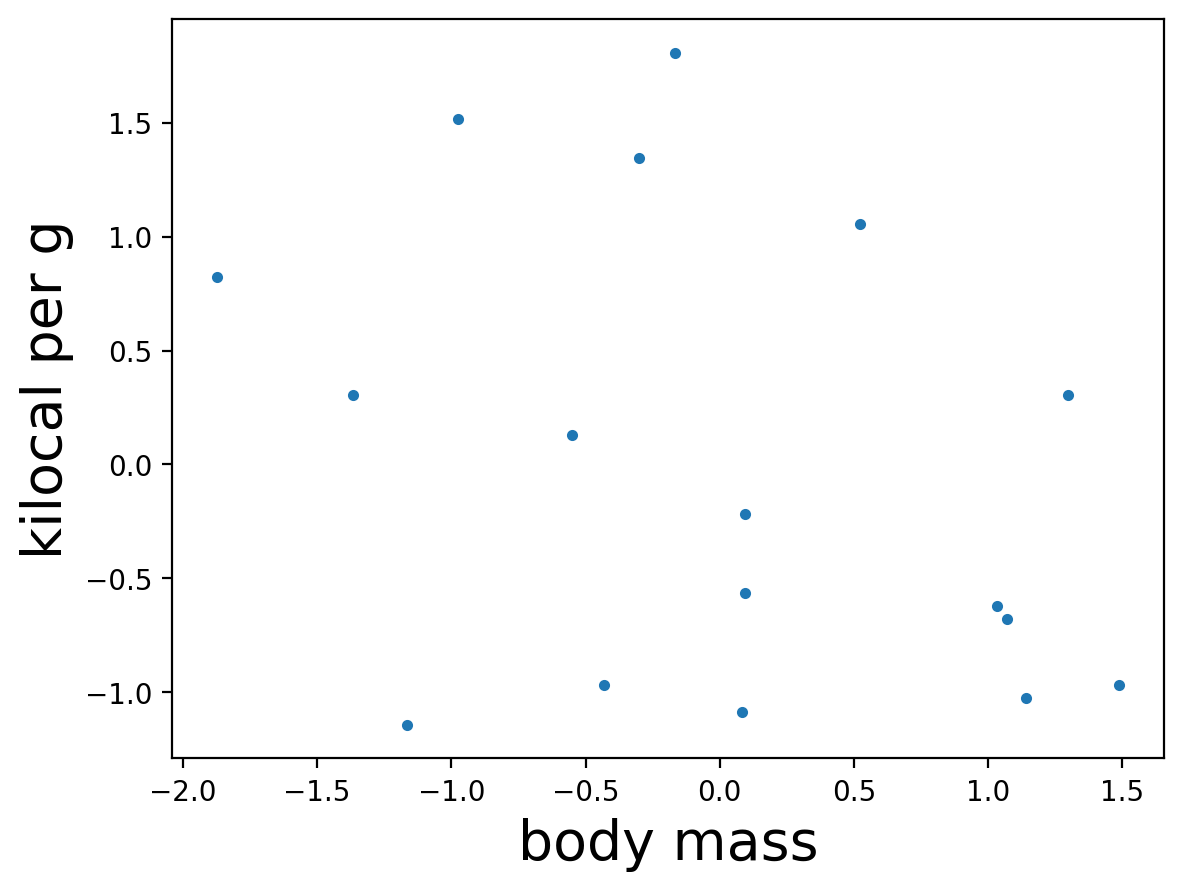

In [ ]:
plot(data_ex2_standardized['mass'], data_ex2_standardized['kcal.per.g'], '.')
xlabel('body mass', fontsize=20)
ylabel('kilocal per g', fontsize=20);

\begin{align}
K_i &\sim \text{Normal}(\mu_i, \sigma) \\
\mu_i & = \alpha + \beta_N N_i \\
\alpha &\sim \text{Normal}(0, 0.2) \\
\beta_N &\sim \text{Normal}(0, 0.5) \\
\sigma &\sim \text{Exponential}(1)
\end{align}

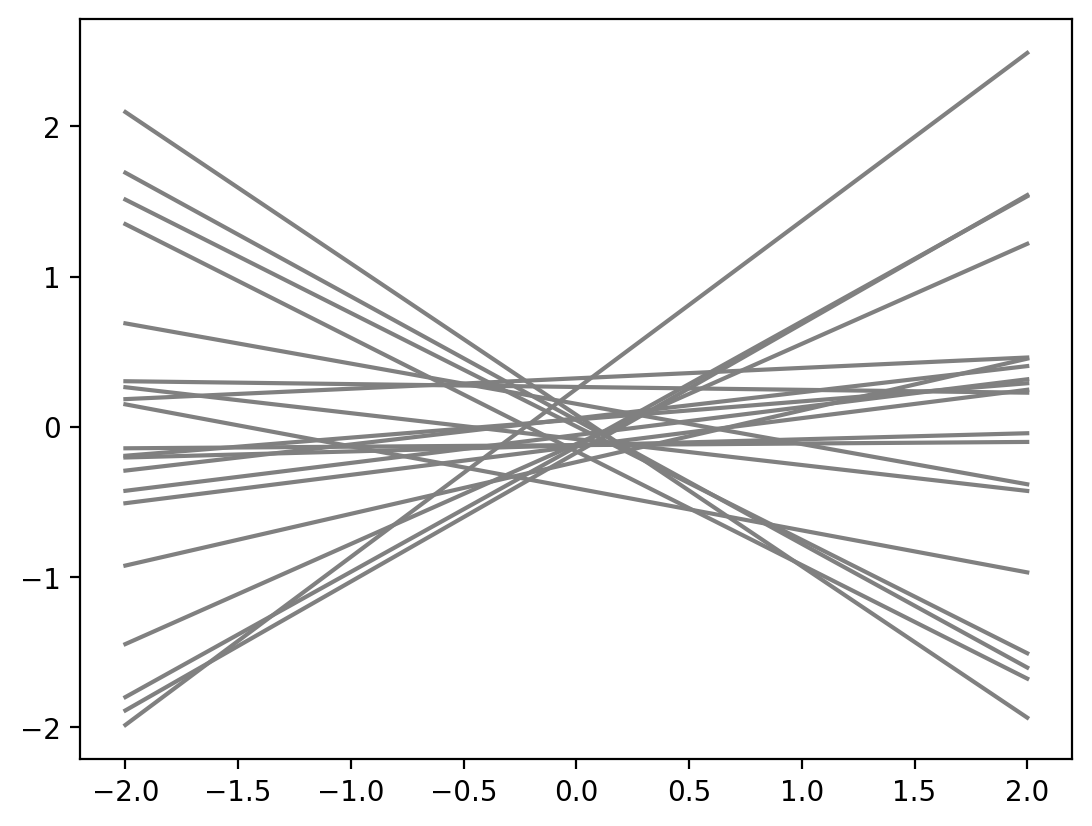

In [ ]:
## check priors
neo = linspace(-2, 2, 3)

alpha = normal(0, 0.2, 20)
beta_N = normal(0, 0.5, 20)

mu = alpha[None, :] + beta_N[None, :]*neo[:, None]
plot(neo, mu, '0.5');

In [ ]:
## model
with pm.Model() as model_KM:
    sigma = pm.Exponential('sigma', 1)
    beta_N = pm.Normal('beta_N', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    mu = alpha + beta_N*data_ex2_standardized['neocortex.perc']
    K = pm.Normal('K', mu=mu, sigma=sigma, observed=data_ex2_standardized['kcal.per.g'])
    _posterior_KN = pm.sample(1000, tune=1000)
    posterior_KN = _posterior_KN.posterior.to_dataframe()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

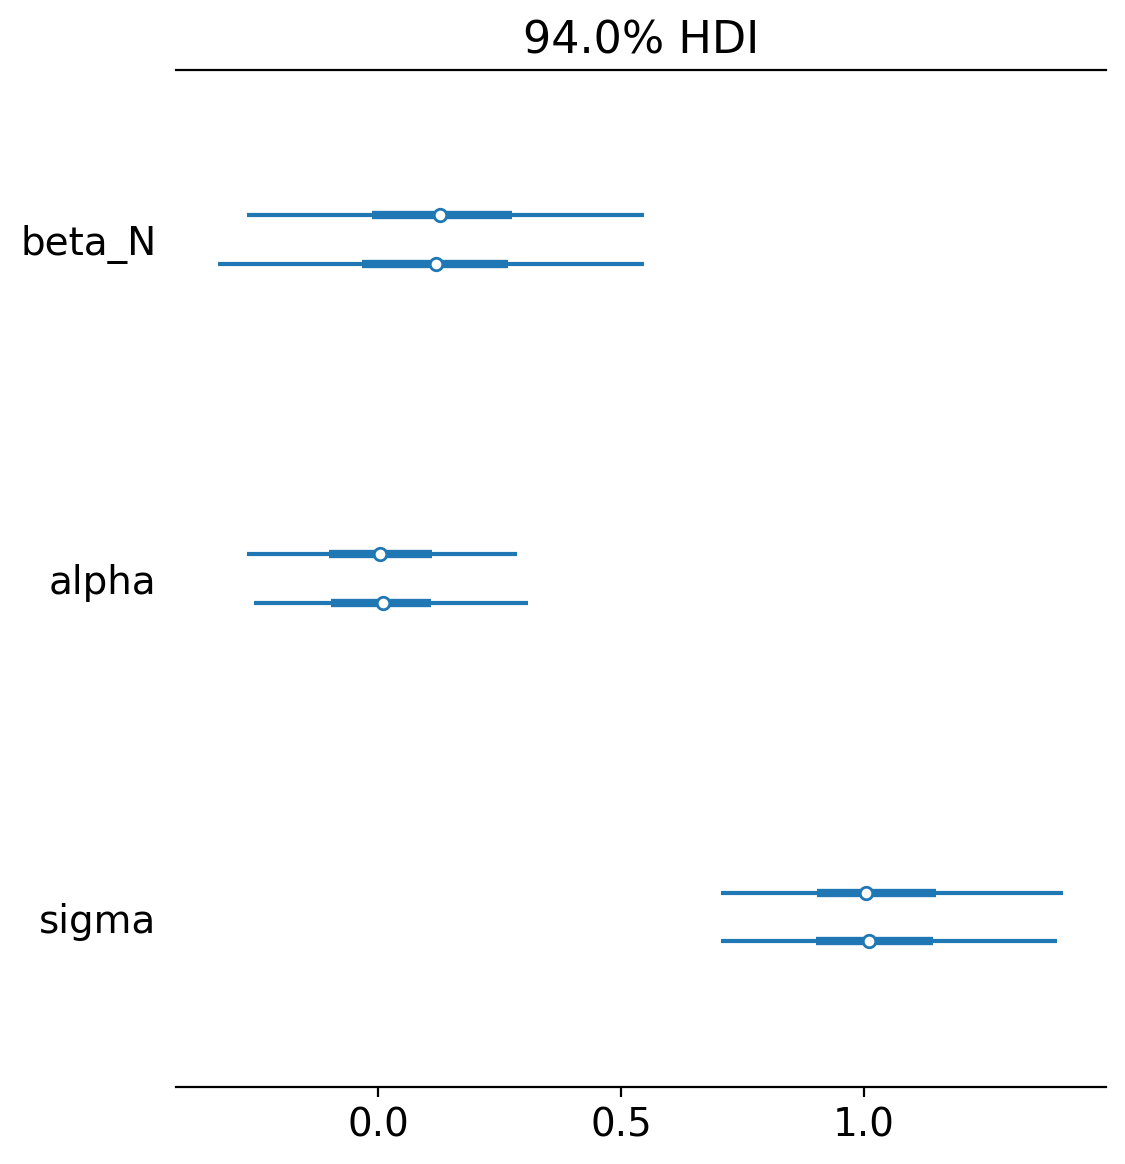

In [ ]:
import arviz as az ## This is new
az.plot_forest(_posterior_KN)

<ipython-input-52-a431bf59acf0>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Kavg = alpha[None, :] + beta_N[None, :]*neo[:, None]
<ipython-input-52-a431bf59acf0>:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  K = normal(Kavg, sigma[None, :])


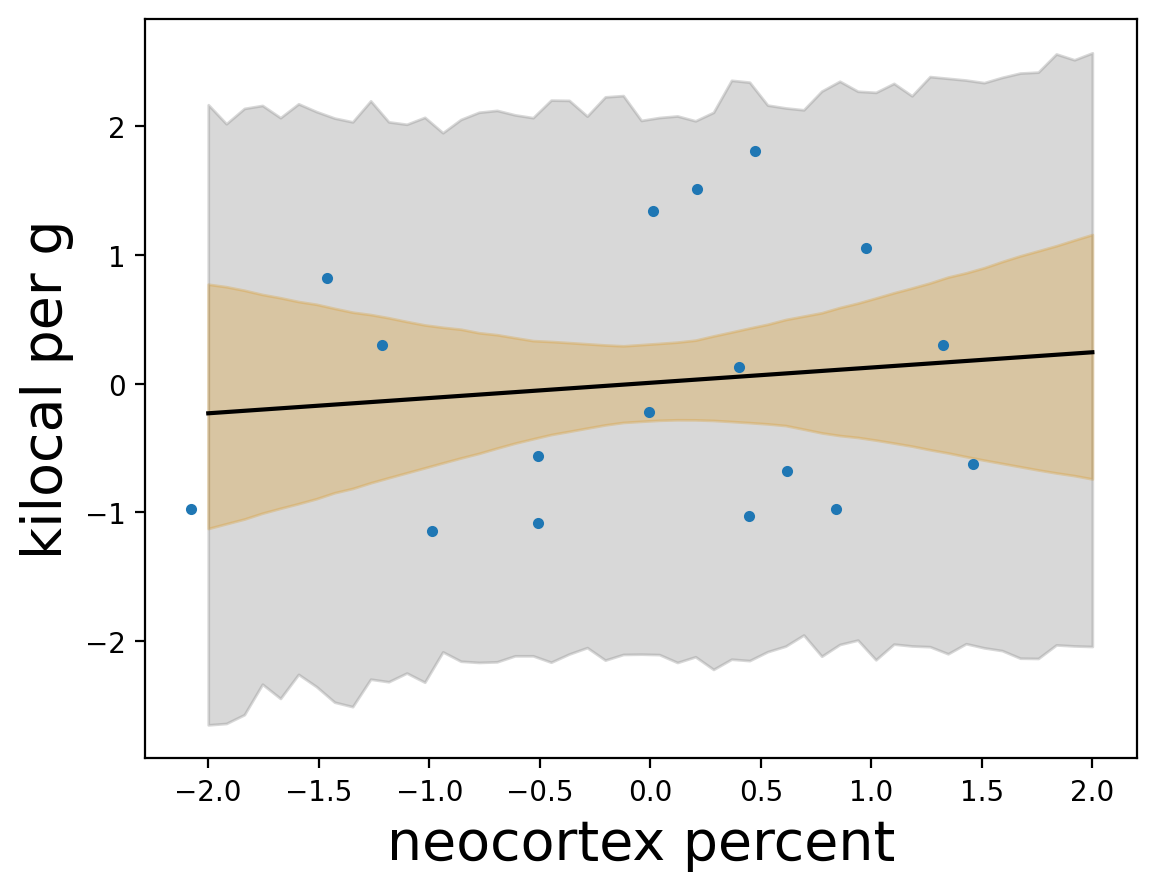

In [ ]:
## analysis plot
plot(data_ex2_standardized['neocortex.perc'], data_ex2_standardized['kcal.per.g'], '.')


neo = linspace(-2, 2, 50)

alpha = array(posterior_KN['alpha'])
beta_N = array(posterior_KN['beta_N'])
sigma = array(posterior_KN['sigma'])

mu = alpha.mean() + beta_N.mean()*neo

Kavg = alpha[None, :] + beta_N[None, :]*neo[:, None]

prob = 0.95
Kavg_lower, Kavg_upper = credible_interval_from_samples(Kavg, prob)
fill_between(neo, Kavg_upper, Kavg_lower, color='orange', alpha=0.3)


K = normal(Kavg, sigma[None, :])

K_lower, K_upper = credible_interval_from_samples(K, prob)
fill_between(neo, K_upper, K_lower, color='0.5', alpha=0.3)

plot(neo, mu, 'k')


xlabel('neocortex percent', fontsize=20)
ylabel('kilocal per g', fontsize=20);

\begin{align}
K_i &\sim \text{Normal}(\mu_i, \sigma) \\
\mu_i & = \alpha + \beta_M M_i \\
\alpha &\sim \text{Normal}(0, 0.2) \\
\beta_M &\sim \text{Normal}(0, 0.5) \\
\sigma &\sim \text{Exponential}(1)
\end{align}

In [ ]:
## model
with pm.Model() as model_KM:
    sigma = pm.Exponential('sigma', 1)
    beta_M = pm.Normal('beta_M', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    mu = alpha + beta_M*data_ex2_standardized['mass']
    K = pm.Normal('K', mu=mu, sigma=sigma, observed=data_ex2_standardized['kcal.per.g'])
    _posterior_KM = pm.sample(1000, tune=1000)
    posterior_KM = _posterior_KM.posterior.to_dataframe()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

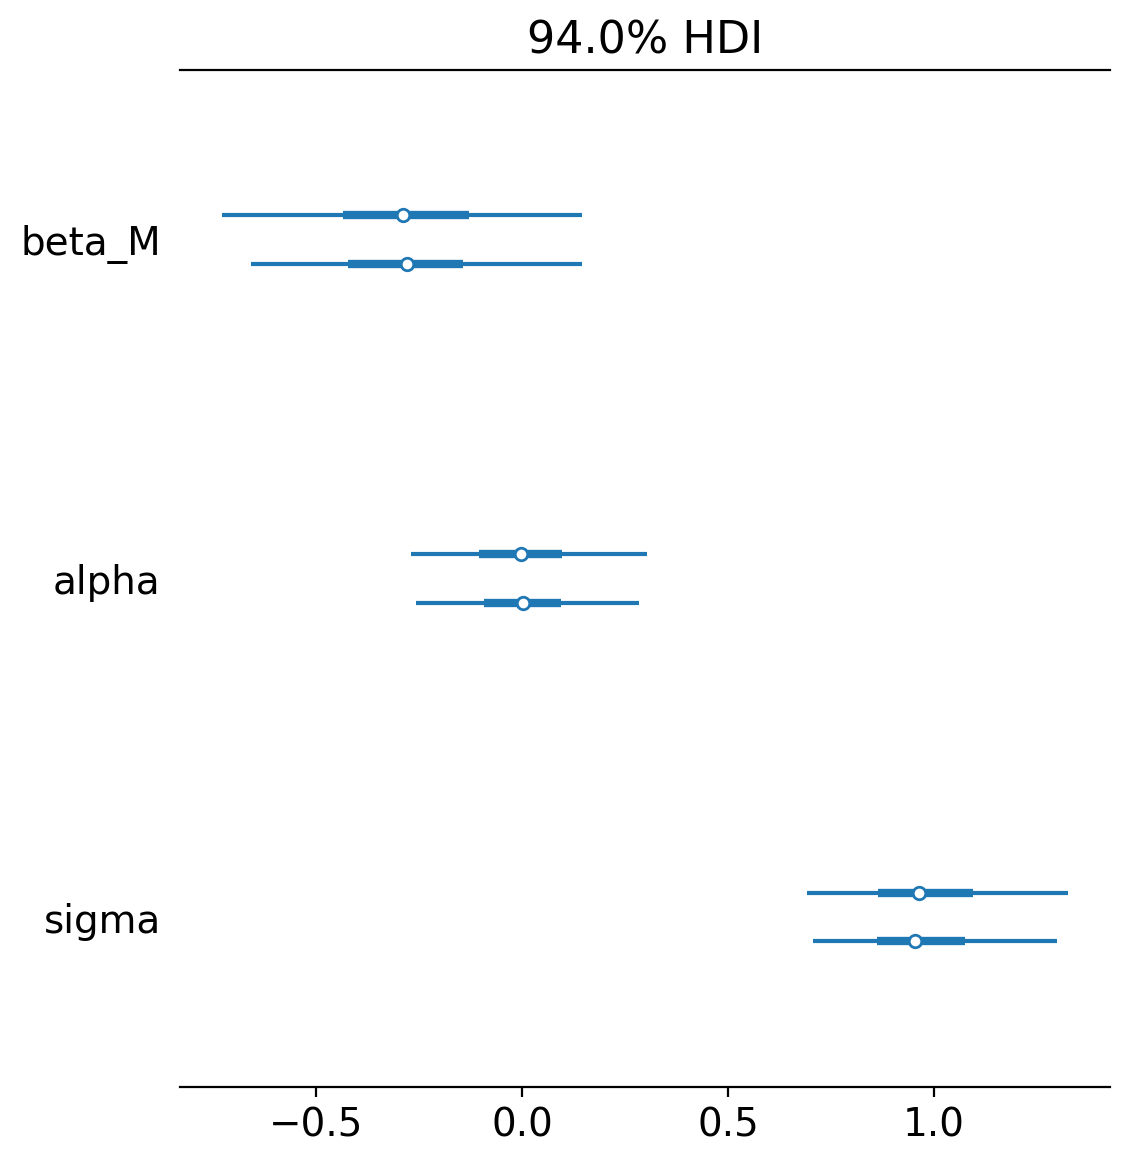

In [ ]:
az.plot_forest(_posterior_KM)

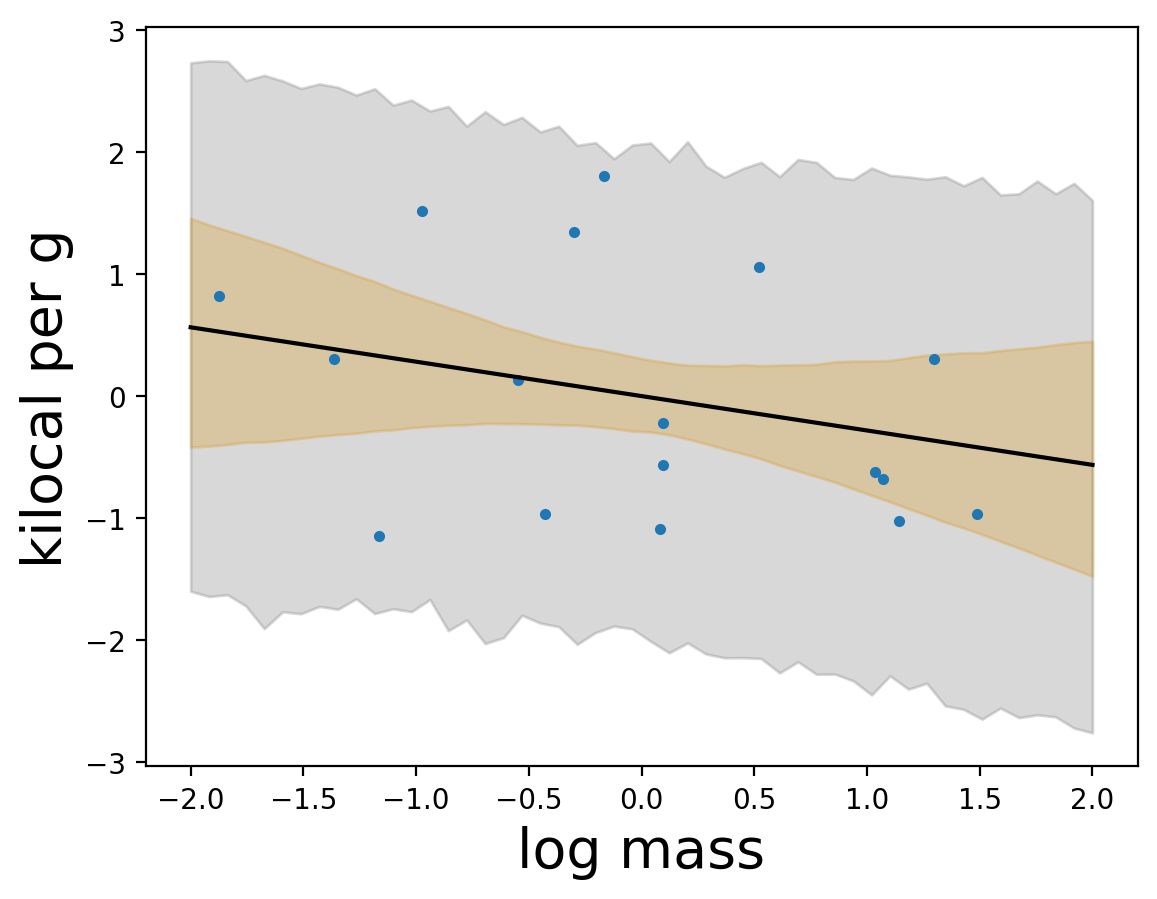

In [ ]:
## analysis plot
plot(data_ex2_standardized['mass'], data_ex2_standardized['kcal.per.g'], '.')


mass = linspace(-2, 2, 50)

alpha = array(posterior_KM['alpha'])
beta_M = array(posterior_KM['beta_M'])
sigma = array(posterior_KM['sigma'])

mu = alpha.mean() + beta_M.mean()*mass

Kavg = alpha[None, :] + beta_M[None, :]*mass[:, None]

prob = 0.95
Kavg_lower, Kavg_upper = credible_interval_from_samples(Kavg, prob)
fill_between(mass, Kavg_upper, Kavg_lower, color='orange', alpha=0.3)


K = normal(Kavg, sigma[None, :])

K_lower, K_upper = credible_interval_from_samples(K, prob)
fill_between(mass, K_upper, K_lower, color='0.5', alpha=0.3)

plot(mass, mu, 'k')


xlabel('log mass', fontsize=20)
ylabel('kilocal per g', fontsize=20);

\begin{align}
K_i &\sim \text{Normal}(\mu_i, \sigma) \\
\mu_i & = \alpha + \beta_N N_i + \beta_M M_i \\
\alpha &\sim \text{Normal}(0, 0.2) \\
\beta_N &\sim \text{Normal}(0, 0.5) \\
\beta_M &\sim \text{Normal}(0, 0.5) \\
\sigma &\sim \text{Exponential}(1)
\end{align}

In [ ]:
## model
with pm.Model() as model_KNM:
    sigma = pm.Exponential('sigma', 1)
    beta_M = pm.Normal('beta_M', mu=0, sigma=0.5)
    beta_N = pm.Normal('beta_N', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    mu = alpha + beta_M*data_ex2_standardized['mass'] + beta_N*data_ex2_standardized['neocortex.perc']
    K = pm.Normal('K', mu=mu, sigma=sigma, observed=data_ex2_standardized['kcal.per.g'])
    _posterior_KNM = pm.sample(1000, tune=1000)
    posterior_KNM = _posterior_KNM.posterior.to_dataframe()
posterior_KNM

beta_M    beta_N     alpha     sigma
chain draw                                        
0     0    -0.715936  0.585072  0.071529  0.782342
      1    -0.876564  0.570081 -0.050687  0.641780
      2    -0.738097  0.768229  0.019833  0.645743
      3    -0.701099  0.398476  0.163655  0.941793
      4    -0.419843 -0.199891 -0.131486  1.276380
...              ...       ...       ...       ...
1     995  -0.856924  0.983241  0.214404  0.967467
      996  -0.716193  0.585574  0.365841  0.723016
      997  -0.838973  0.829728  0.232851  0.732767
      998  -0.860791  0.786028  0.100466  0.771637
      999  -0.942471  0.775840  0.131723  0.632470

[2000 rows x 4 columns]

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

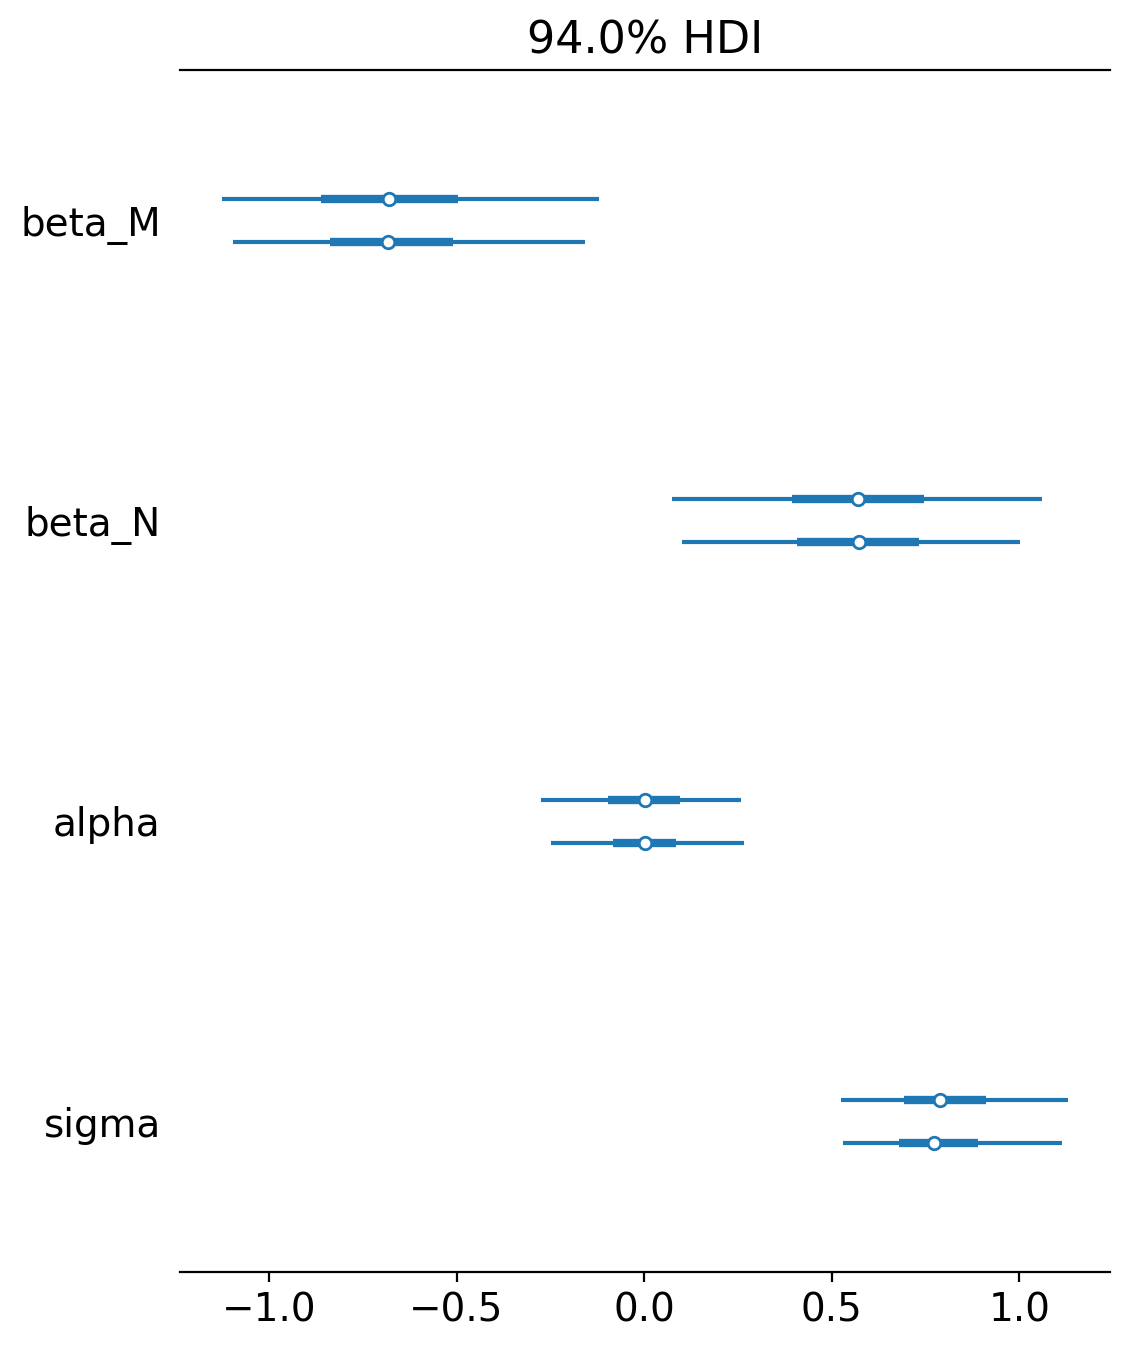

In [ ]:
az.plot_forest(_posterior_KNM)

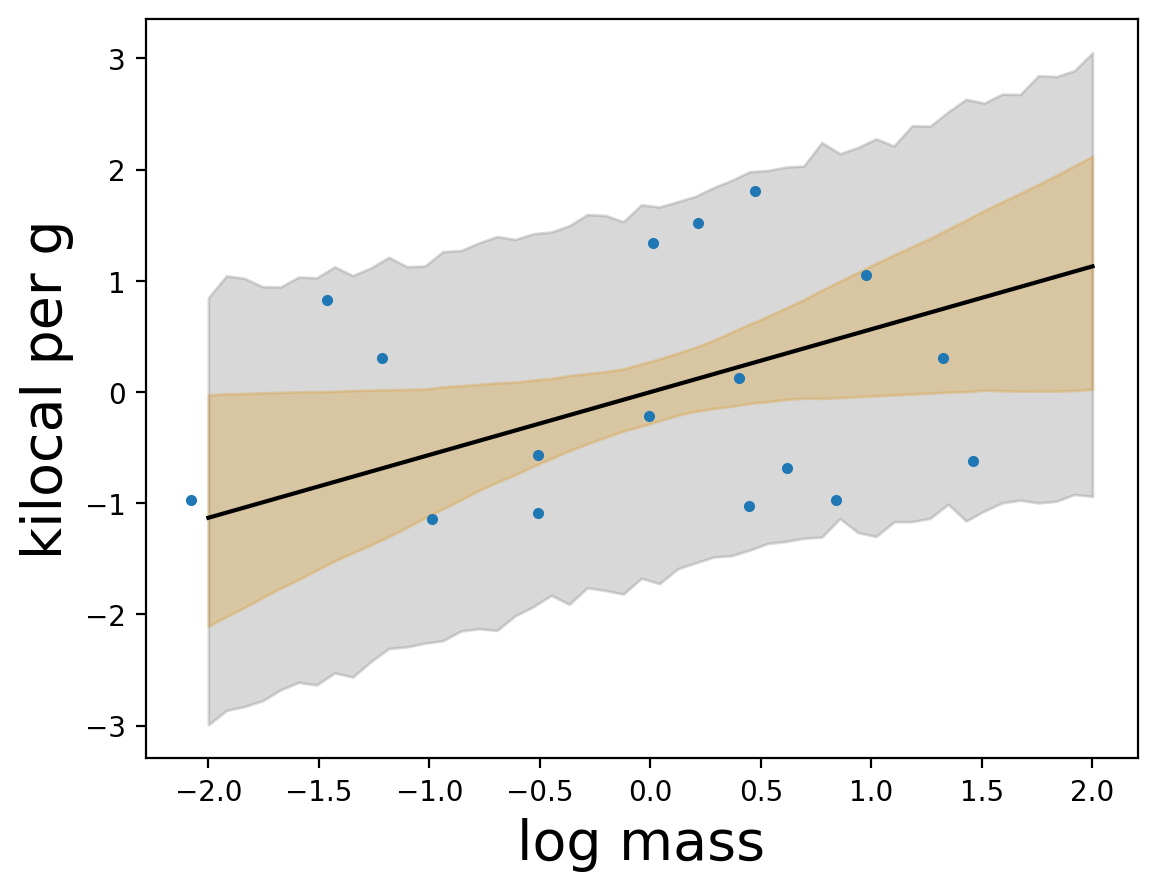

In [ ]:
## counterfactual analysis

## analysis plot
plot(data_ex2_standardized['neocortex.perc'], data_ex2_standardized['kcal.per.g'], '.')


neo = linspace(-2, 2, 50)
mass = array([0.])

alpha = array(posterior_KNM['alpha'])
beta_M = array(posterior_KNM['beta_M'])
beta_N = array(posterior_KNM['beta_N'])
sigma = array(posterior_KNM['sigma'])

mu = alpha.mean() + beta_M.mean()*mass + beta_N.mean()*neo

Kavg = alpha[None, :] + beta_M[None, :]*mass[:, None] + beta_N[None, :]*neo[:, None]

prob = 0.95
Kavg_lower, Kavg_upper = credible_interval_from_samples(Kavg, prob)
fill_between(neo, Kavg_upper, Kavg_lower, color='orange', alpha=0.3)


K = normal(Kavg, sigma[None, :])

K_lower, K_upper = credible_interval_from_samples(K, prob)
fill_between(neo, K_upper, K_lower, color='0.5', alpha=0.3)

plot(neo, mu, 'k')


xlabel('log mass', fontsize=20)
ylabel('kilocal per g', fontsize=20);


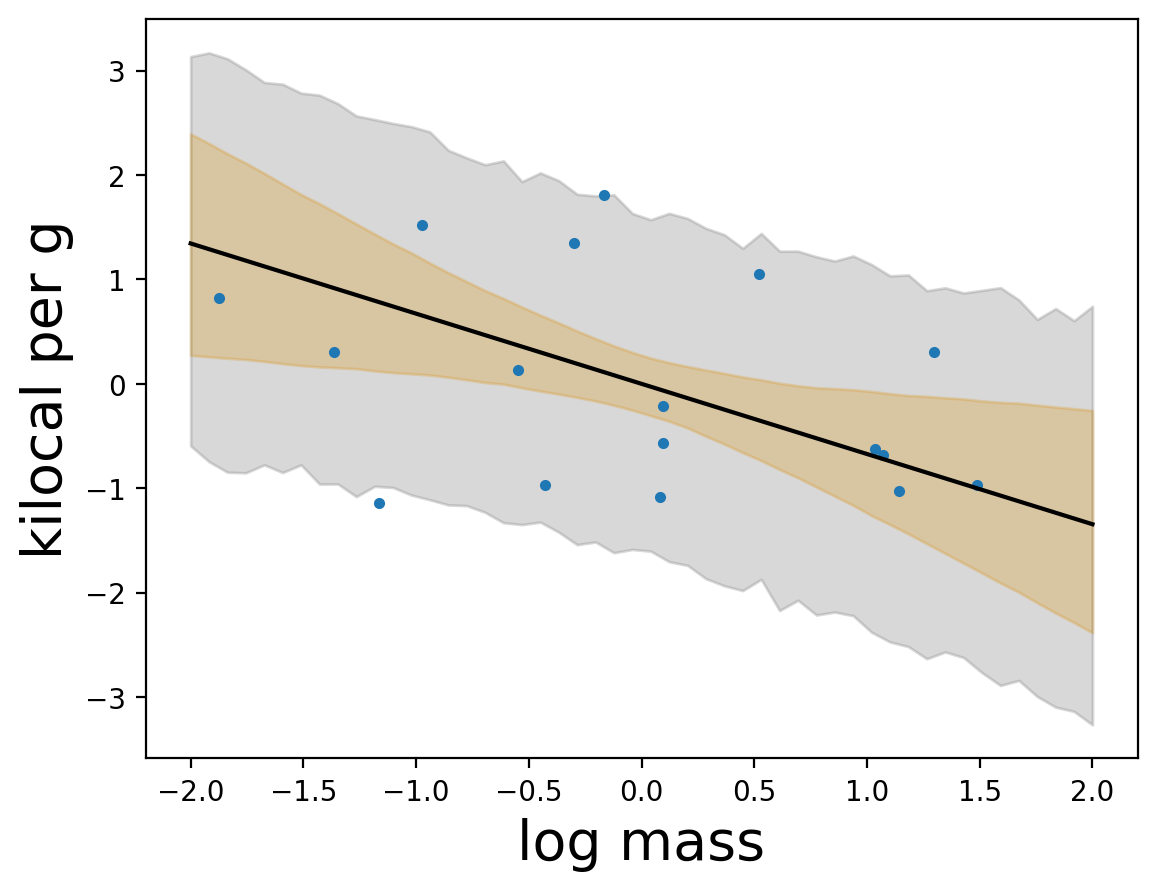

In [ ]:
## counterfactual analysis

## analysis plot
plot(data_ex2_standardized['mass'], data_ex2_standardized['kcal.per.g'], '.')


mass = linspace(-2, 2, 50)
neo = array([0.])

alpha = array(posterior_KNM['alpha'])
beta_M = array(posterior_KNM['beta_M'])
beta_N = array(posterior_KNM['beta_N'])
sigma = array(posterior_KNM['sigma'])

mu = alpha.mean() + beta_M.mean()*mass + beta_N.mean()*neo

Kavg = alpha[None, :] + beta_M[None, :]*mass[:, None] + beta_N[None, :]*neo[:, None]

prob = 0.95
Kavg_lower, Kavg_upper = credible_interval_from_samples(Kavg, prob)
fill_between(mass, Kavg_upper, Kavg_lower, color='orange', alpha=0.3)


K = normal(Kavg, sigma[None, :])

K_lower, K_upper = credible_interval_from_samples(K, prob)
fill_between(mass, K_upper, K_lower, color='0.5', alpha=0.3)

plot(mass, mu, 'k')


xlabel('log mass', fontsize=20)
ylabel('kilocal per g', fontsize=20);


## Effect of N on M
The cause of the masked effect: highly correlated predictor variables

In [ ]:
## model
with pm.Model() as model_NM:
    sigma = pm.Exponential('sigma', 1)
    beta_NM = pm.Normal('beta_NM', mu=0, sigma=0.5)
    alpha = pm.Normal('alpha', mu=0, sigma=0.2)
    mu = alpha + beta_NM*data_ex2_standardized['neocortex.perc']
    M = pm.Normal('M', mu=mu, sigma=sigma, observed=data_ex2_standardized['mass'])
    _posterior_MN = pm.sample(1000, tune=1000)
    posterior_MN = _posterior_MN.posterior.to_dataframe()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

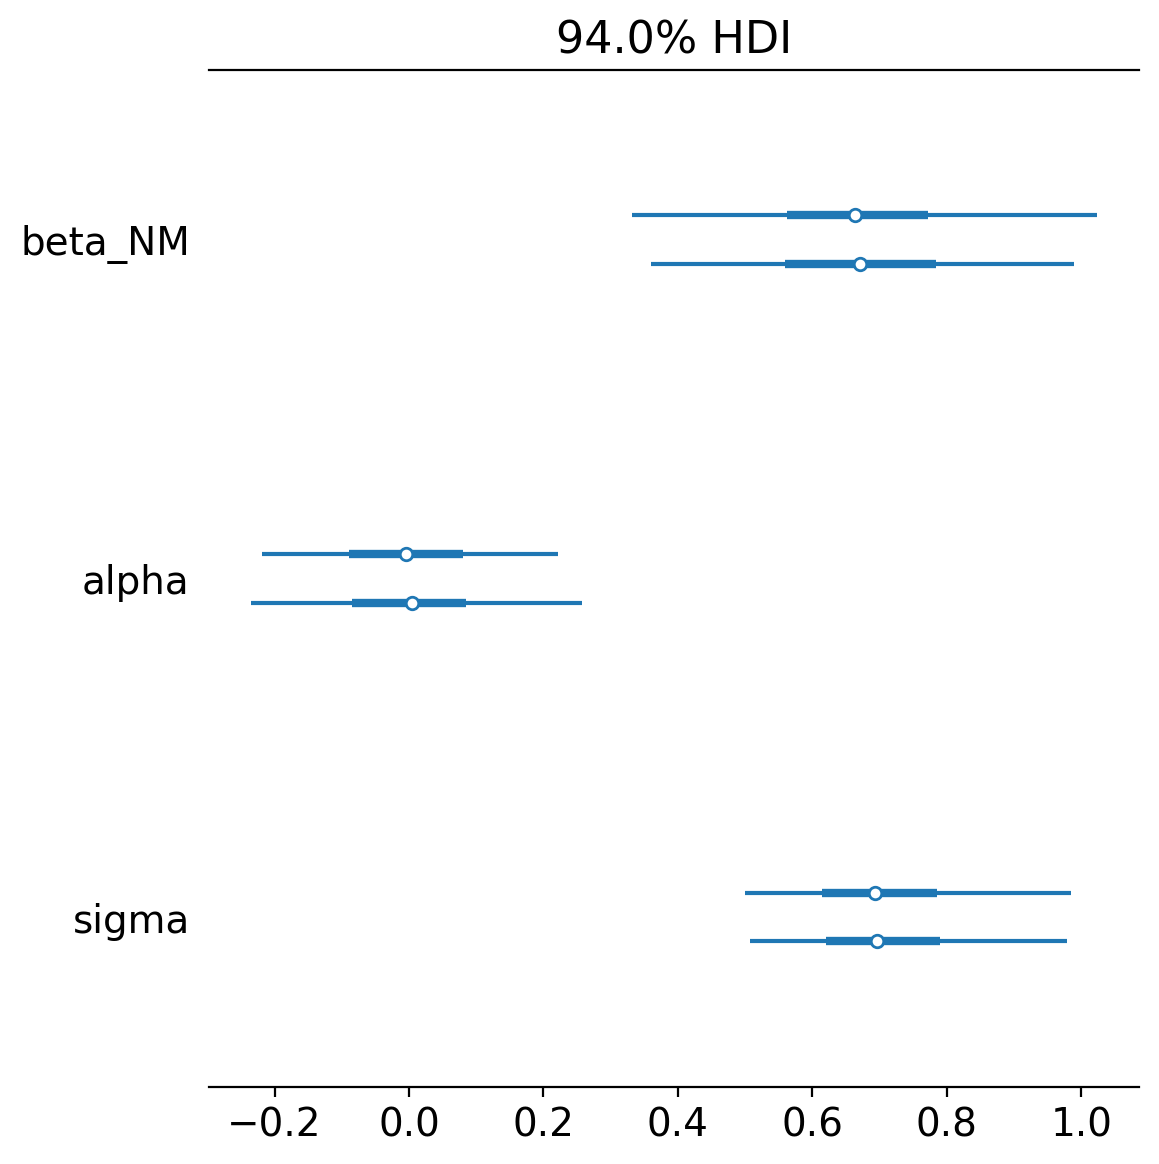

In [ ]:
az.plot_forest(_posterior_MN)